# 17: 03: betatronic bunch mismatch scan with space charge

In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import scipy.io as sio 
import matplotlib.cm as cm
import PyNAFF as pnf

In [2]:
plt.rcParams['figure.figsize'] = [8.0, 4.0]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1

In [3]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p	
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

In [4]:
dd1 = dict()

#dd1 = add_input_file(dd1, '01_SbS_Tomo_V10_dBeta_00/output/output.mat', '00')
dd1 = add_input_file(dd1, '03_SbS_Tomo_V10_betatron_01/output/output.mat', '01')
dd1 = add_input_file(dd1, '03_SbS_Tomo_V10_betatron_02/output/output.mat', '02')
dd1 = add_input_file(dd1, '03_SbS_Tomo_V10_betatron_03/output/output.mat', '03')
dd1 = add_input_file(dd1, '03_SbS_Tomo_V10_betatron_04/output/output.mat', '04')
dd1 = add_input_file(dd1, '03_SbS_Tomo_V10_betatron_05/output/output.mat', '05')
dd1 = add_input_file(dd1, '03_SbS_Tomo_V10_betatron_10/output/output.mat', '10')
dd1 = add_input_file(dd1, '03_SbS_Tomo_V10_betatron_15/output/output.mat', '15')
dd1 = add_input_file(dd1, '03_SbS_Tomo_V10_betatron_20/output/output.mat', '20')
dd1 = add_input_file(dd1, '03_SbS_Tomo_V10_betatron_25/output/output.mat', '25')
sc = 'SbS'
legend_label = r'$\frac{\epsilon_{new}}{\epsilon_0} [\%]$'

Plot_Folder = 'Plots_03'    
main_label = 'PFW Betatron Mismatch Vertical'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 2200
zoom_turns = 15
turns = [0, 1, 10, 50, 100, 874, 2185, 2199]
betagamma = 2.492104532 * 0.9159915293879255

	Added output data from  03_SbS_Tomo_V10_betatron_01/output/output.mat 	 dictionary key:  01
	Added output data from  03_SbS_Tomo_V10_betatron_02/output/output.mat 	 dictionary key:  02
	Added output data from  03_SbS_Tomo_V10_betatron_03/output/output.mat 	 dictionary key:  03
	Added output data from  03_SbS_Tomo_V10_betatron_04/output/output.mat 	 dictionary key:  04
	Added output data from  03_SbS_Tomo_V10_betatron_05/output/output.mat 	 dictionary key:  05
	Added output data from  03_SbS_Tomo_V10_betatron_10/output/output.mat 	 dictionary key:  10
	Added output data from  03_SbS_Tomo_V10_betatron_15/output/output.mat 	 dictionary key:  15
	Added output data from  03_SbS_Tomo_V10_betatron_20/output/output.mat 	 dictionary key:  20
	Added output data from  03_SbS_Tomo_V10_betatron_25/output/output.mat 	 dictionary key:  25


In [5]:
dd1['02'].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'turn_time',
 'n_mp',
 'min_xp',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'min_y',
 'mu_y',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'kurtosis_xp',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'mu_z',
 'mean_xp',
 'min_z',
 'kurtosis_dE',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

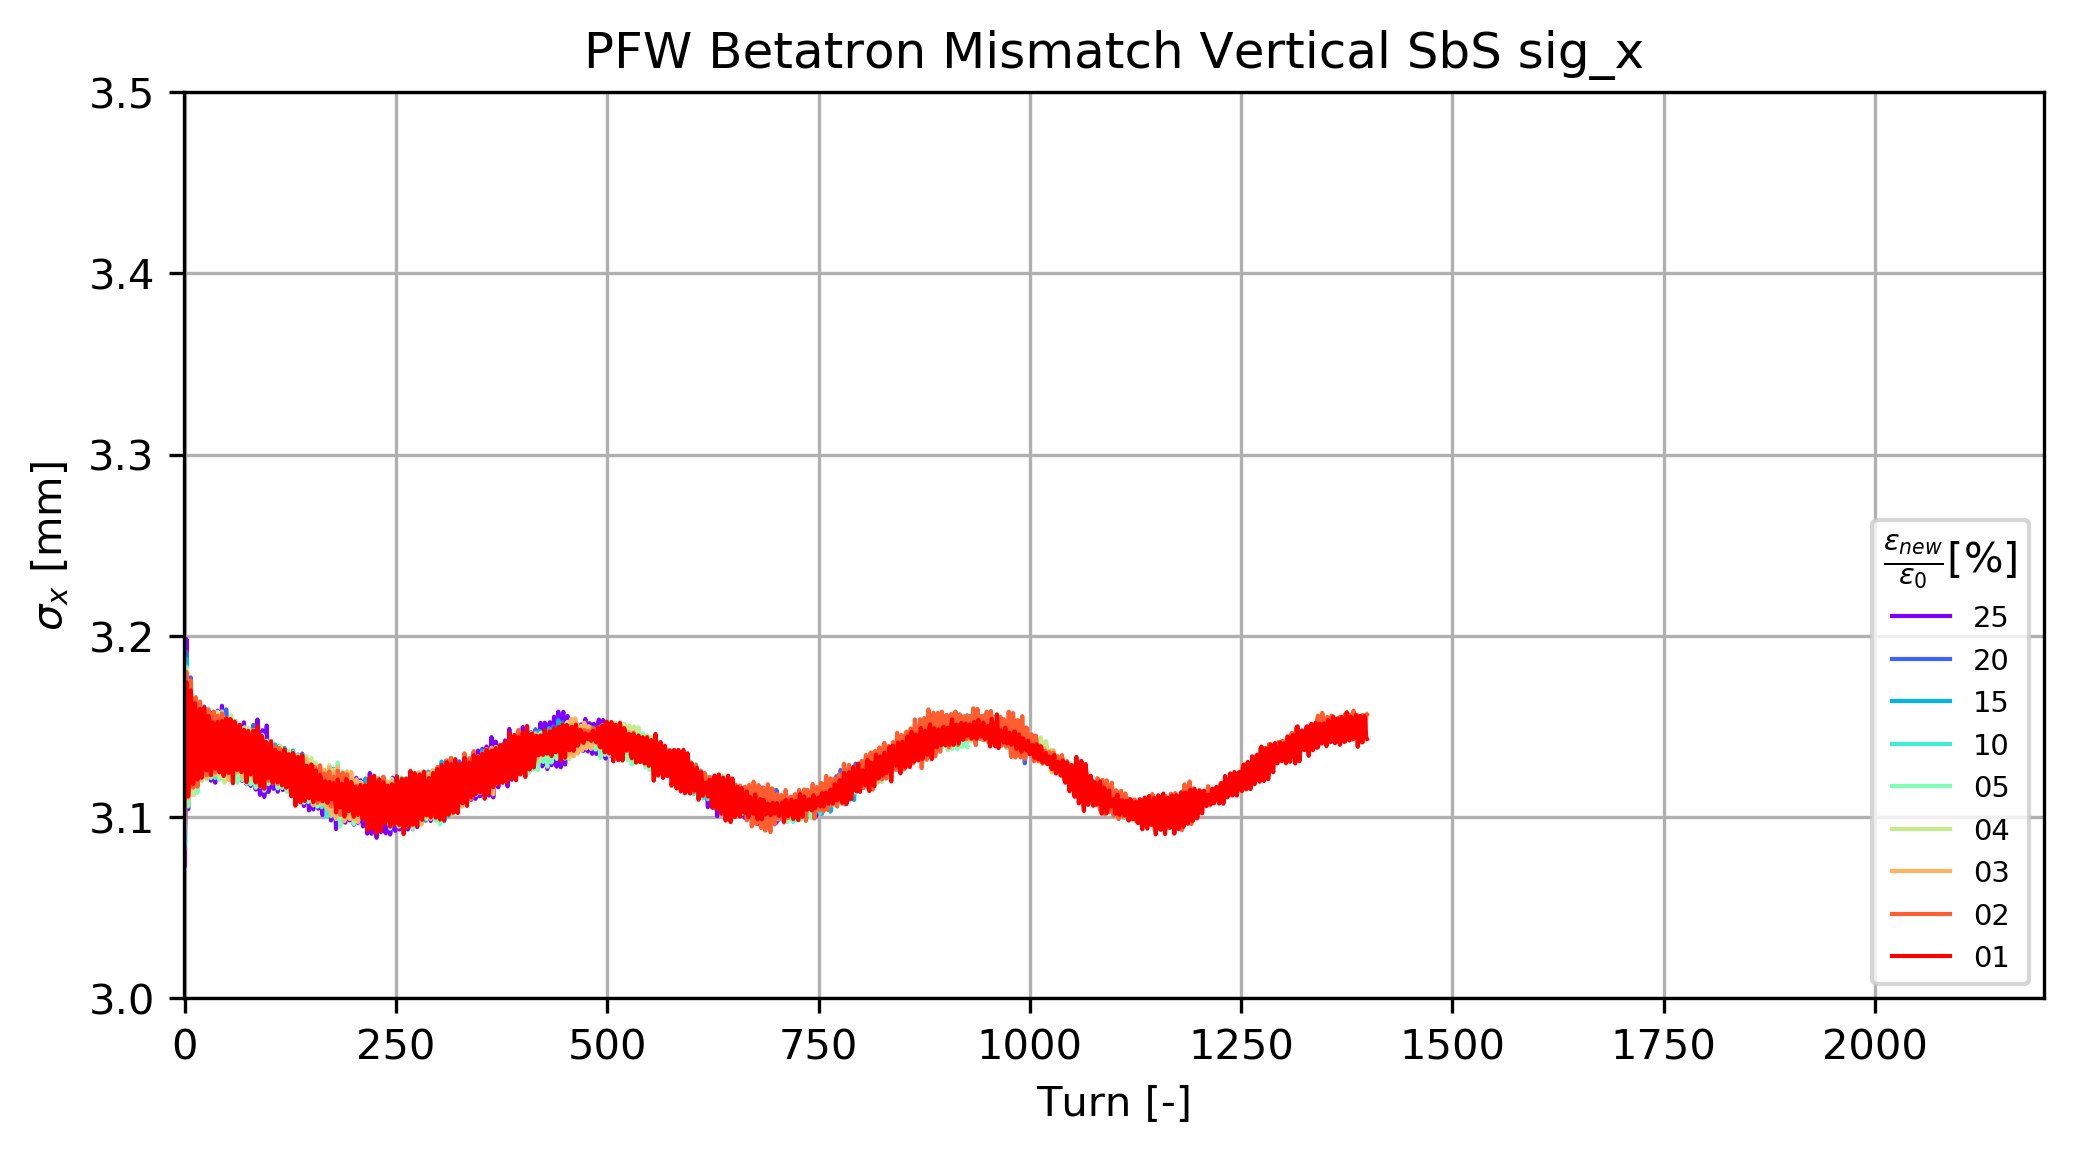

In [6]:
parameter = 'sig_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
ax1.set_ylim(3,3.5)

savename = Plot_Folder +'/Betatron_' + parameter + '_V.png'
plt.savefig(savename, dpi = 800);

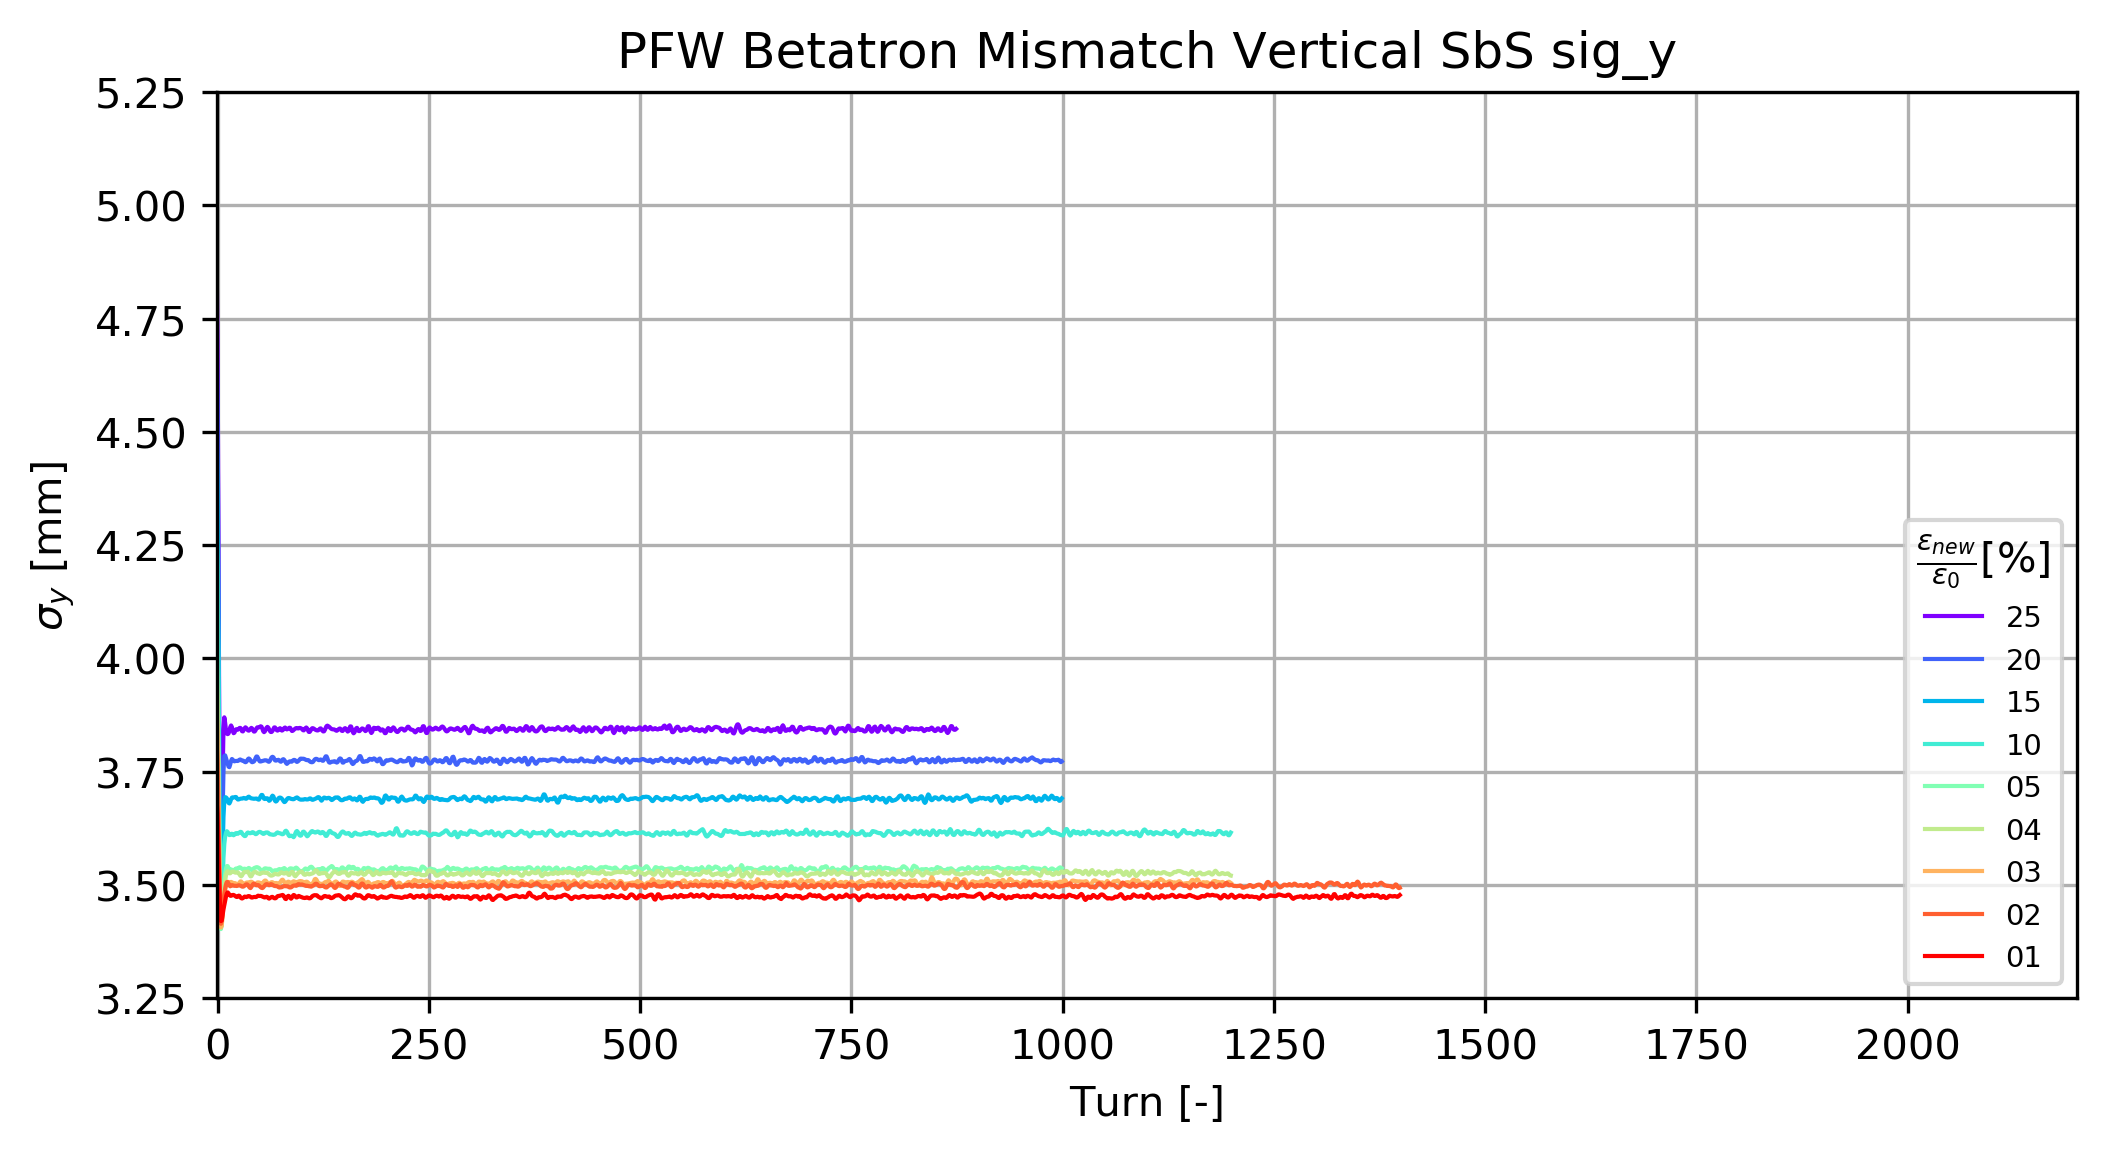

In [7]:
parameter = 'sig_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_y$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
ax1.set_xlim(-1,2200);
ax1.set_ylim(3.25, 5.25)

savename = Plot_Folder +'/Betatron_' + parameter + '_V.png'
plt.savefig(savename, dpi = 800);

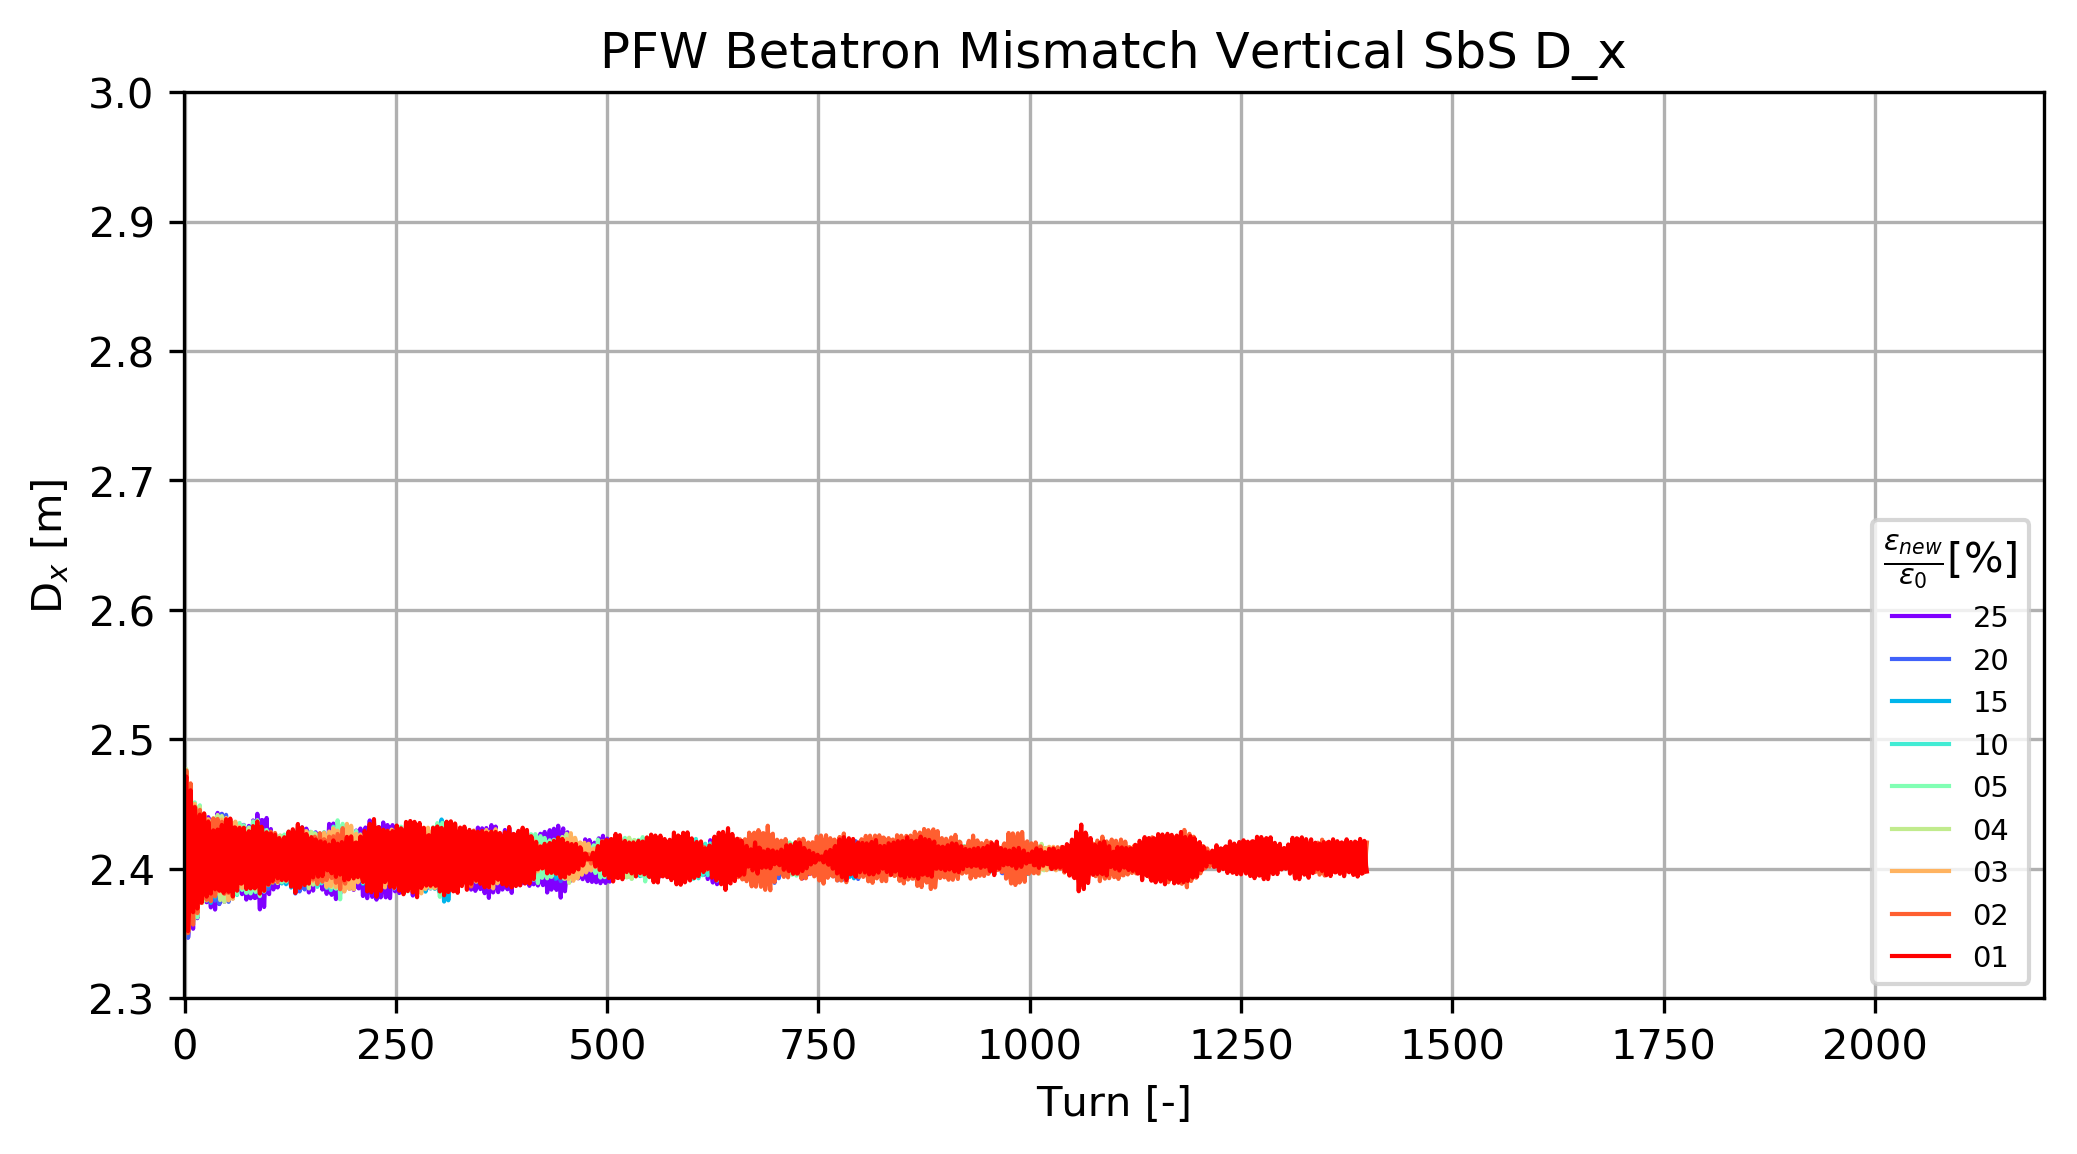

In [8]:
parameter = 'D_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'D$_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
ax1.set_xlim(-1,2200);
ax1.set_ylim(2.3, 3)

savename = Plot_Folder +'/Betatron_' + parameter + '_V.png'
plt.savefig(savename, dpi = 800);

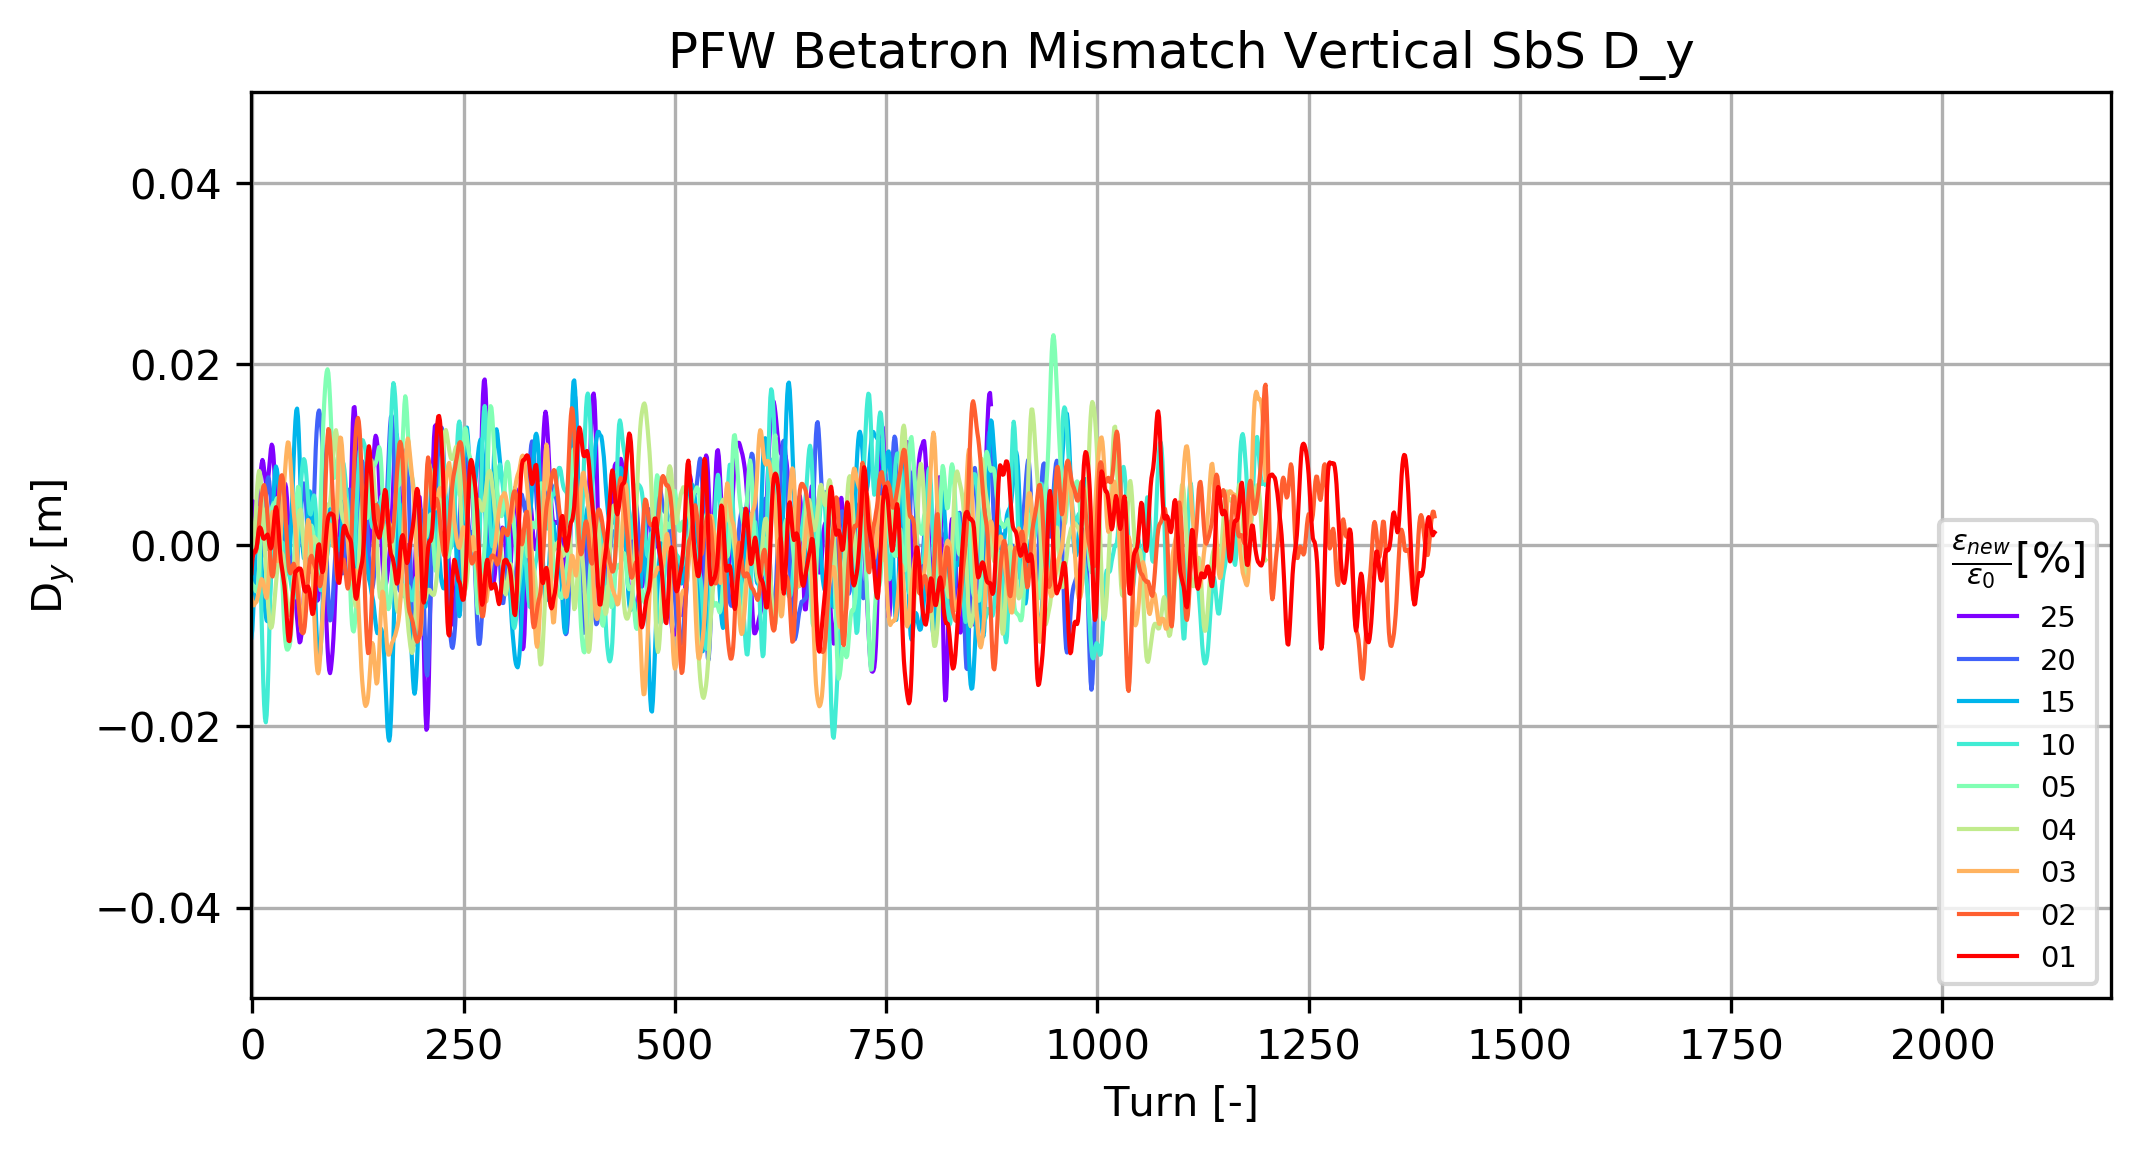

In [9]:
parameter = 'D_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'D$_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
ax1.set_xlim(-1,2200);
ax1.set_ylim(-0.05, 0.05)

savename = Plot_Folder +'/Betatron_' + parameter + '_V.png'
plt.savefig(savename, dpi = 800);

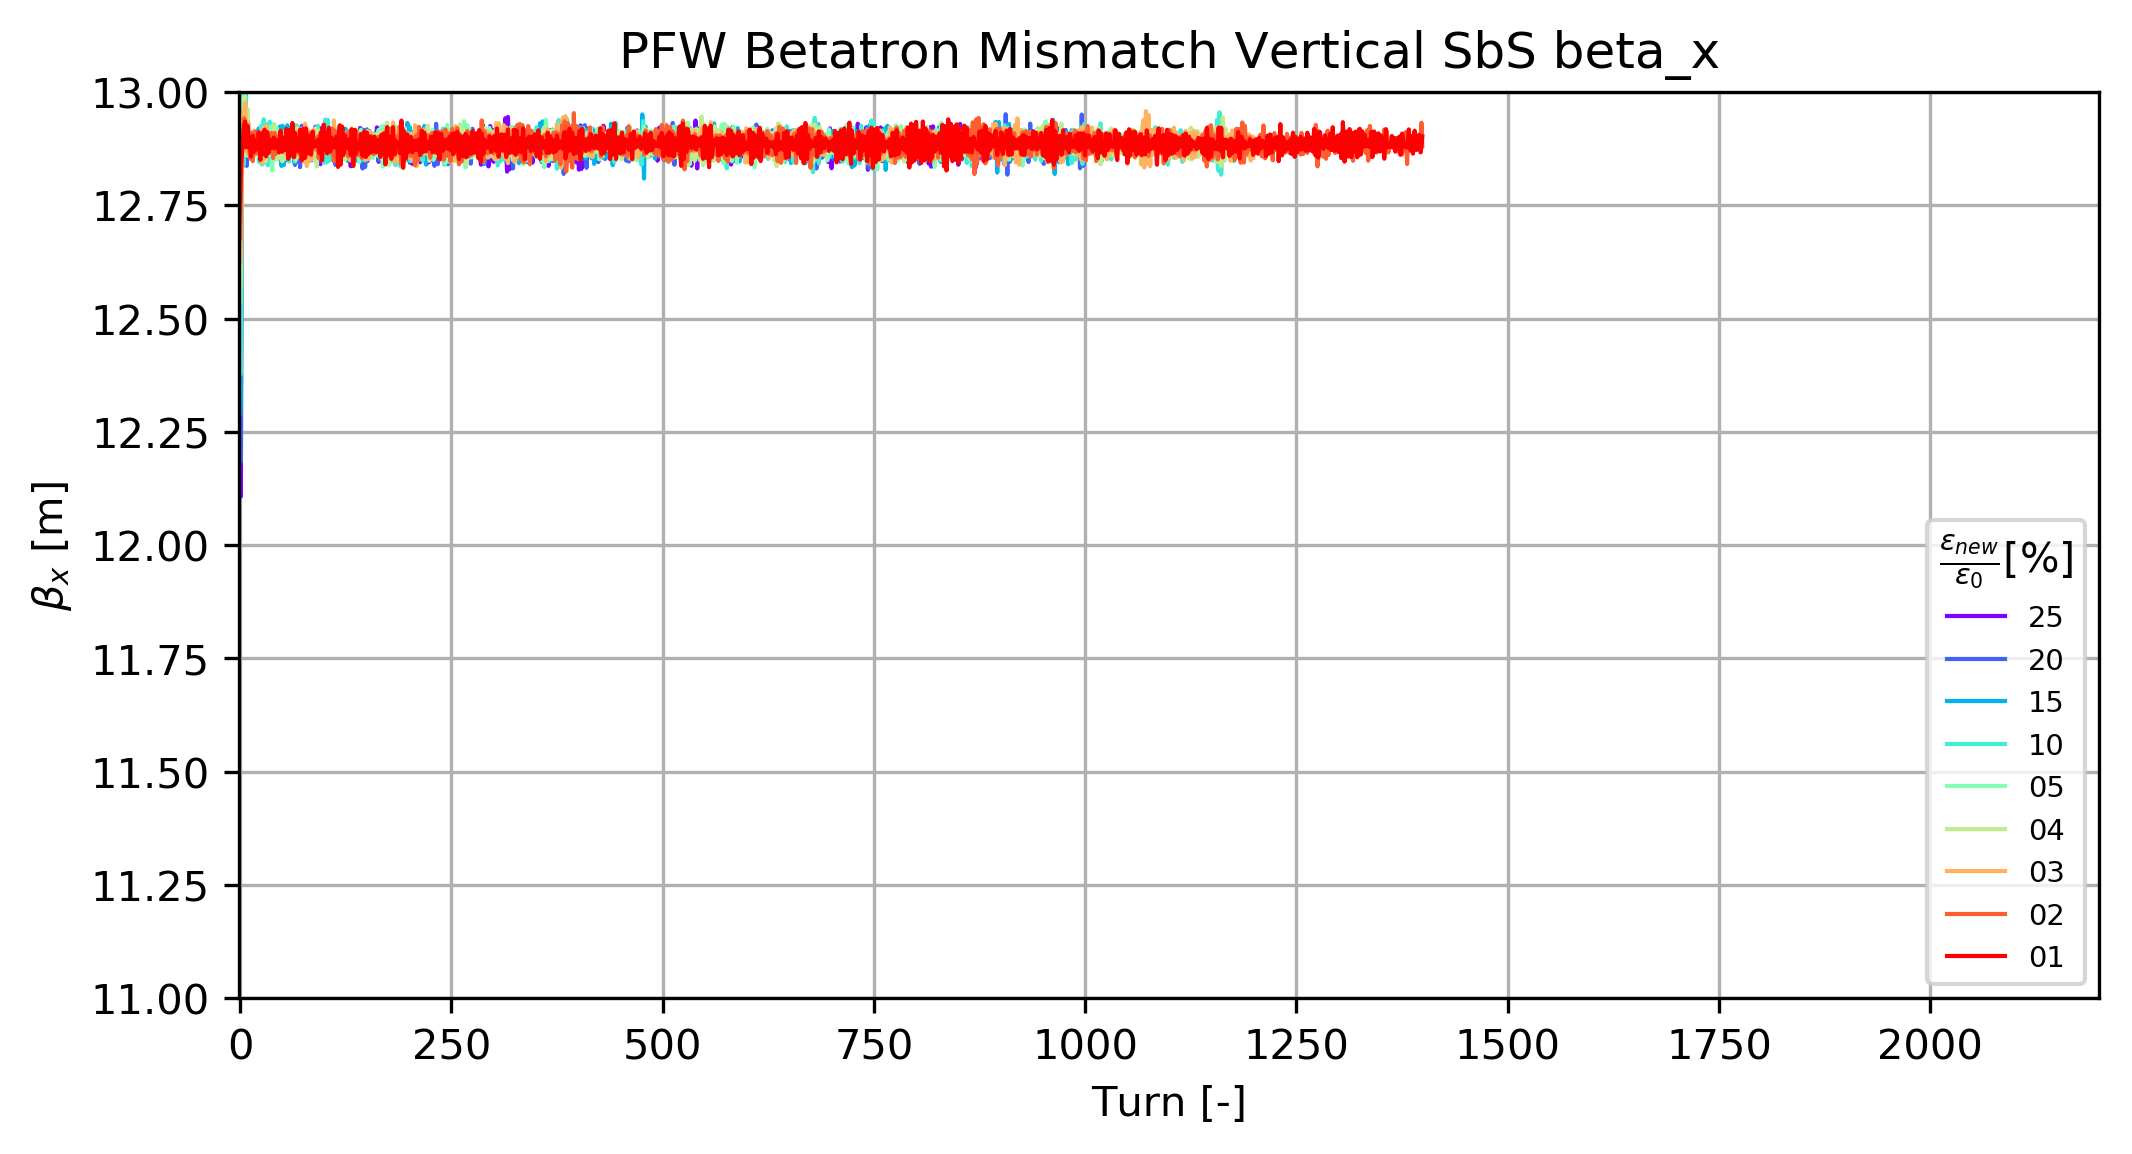

In [10]:
parameter = 'beta_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
ax1.set_xlim(-1,2200);
ax1.set_ylim(11, 13)

savename = Plot_Folder +'/Betatron_' + parameter + '_V.png'
plt.savefig(savename, dpi = 800);

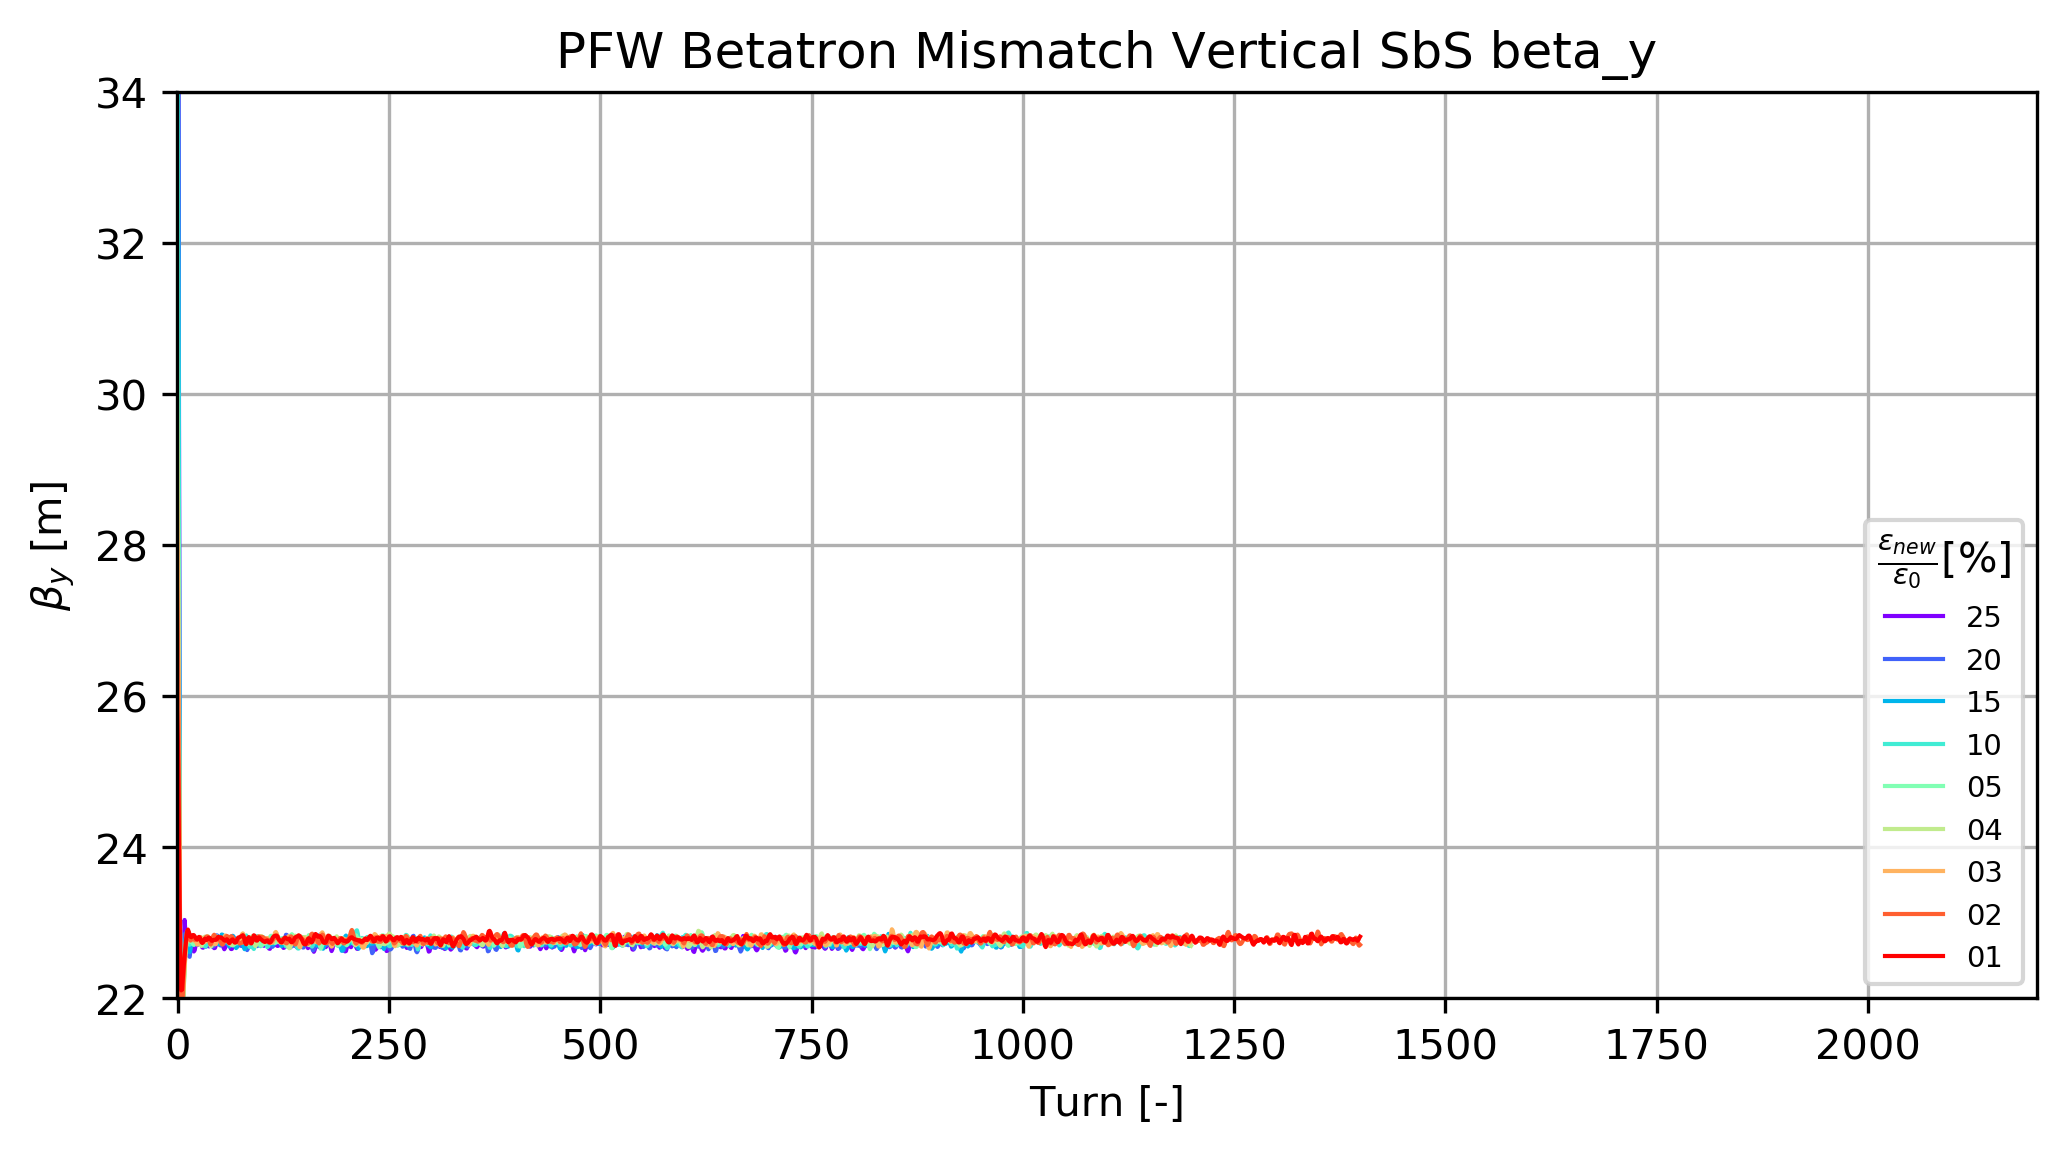

In [11]:
parameter = 'beta_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
ax1.set_xlim(-1,2200);
ax1.set_ylim(22, 34)

savename = Plot_Folder +'/Betatron_' + parameter + '_V.png'
plt.savefig(savename, dpi = 800);

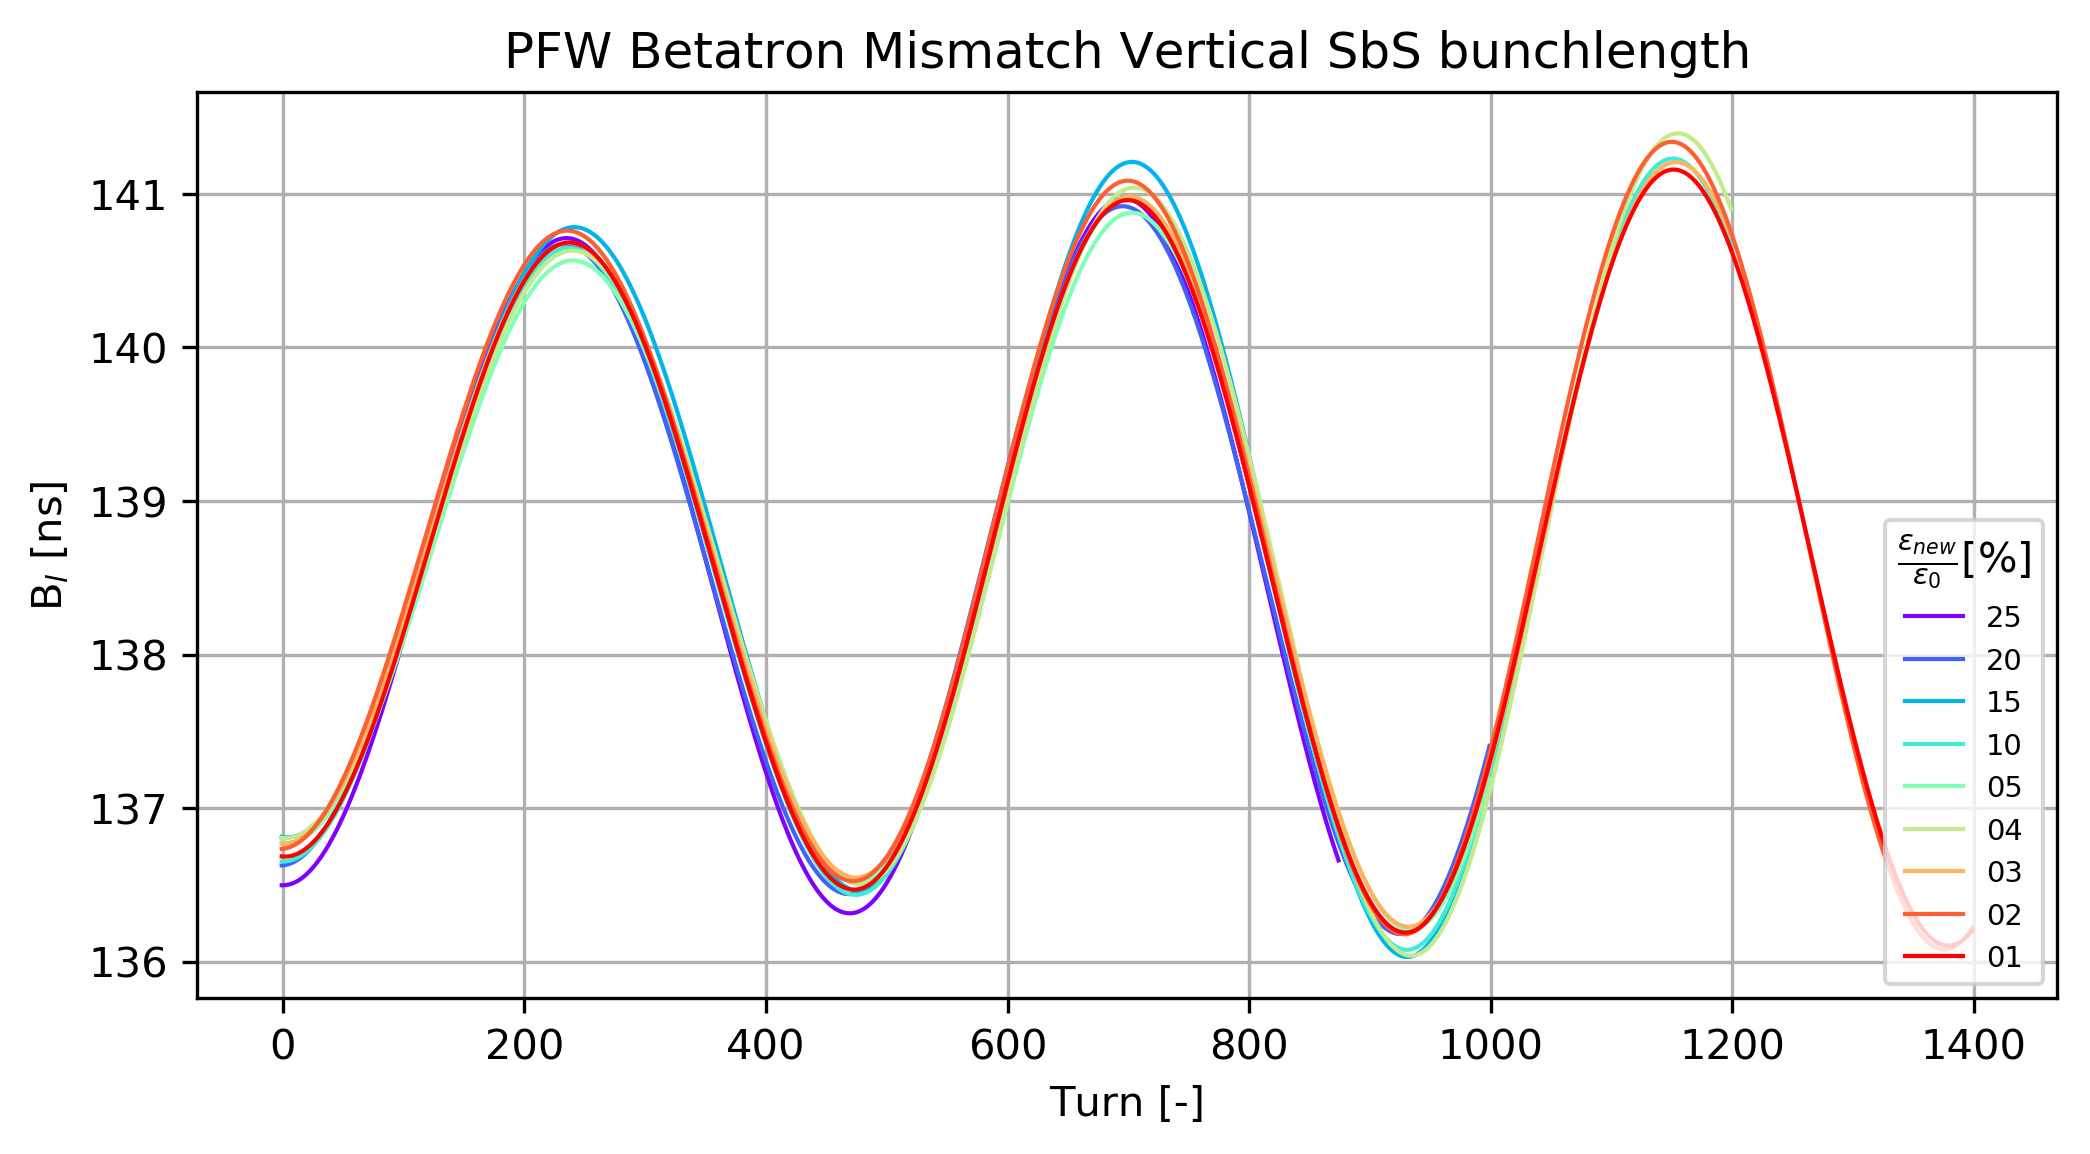

In [12]:
parameter = 'bunchlength'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'B$_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E9, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
#ax1.set_xlim(-1,10);
#ax1.set_ylim(125,150)
#ax1.set_ylim(134,144)

savename = Plot_Folder +'/Betatron_' + parameter + '_V.png'
plt.savefig(savename, dpi = 800);

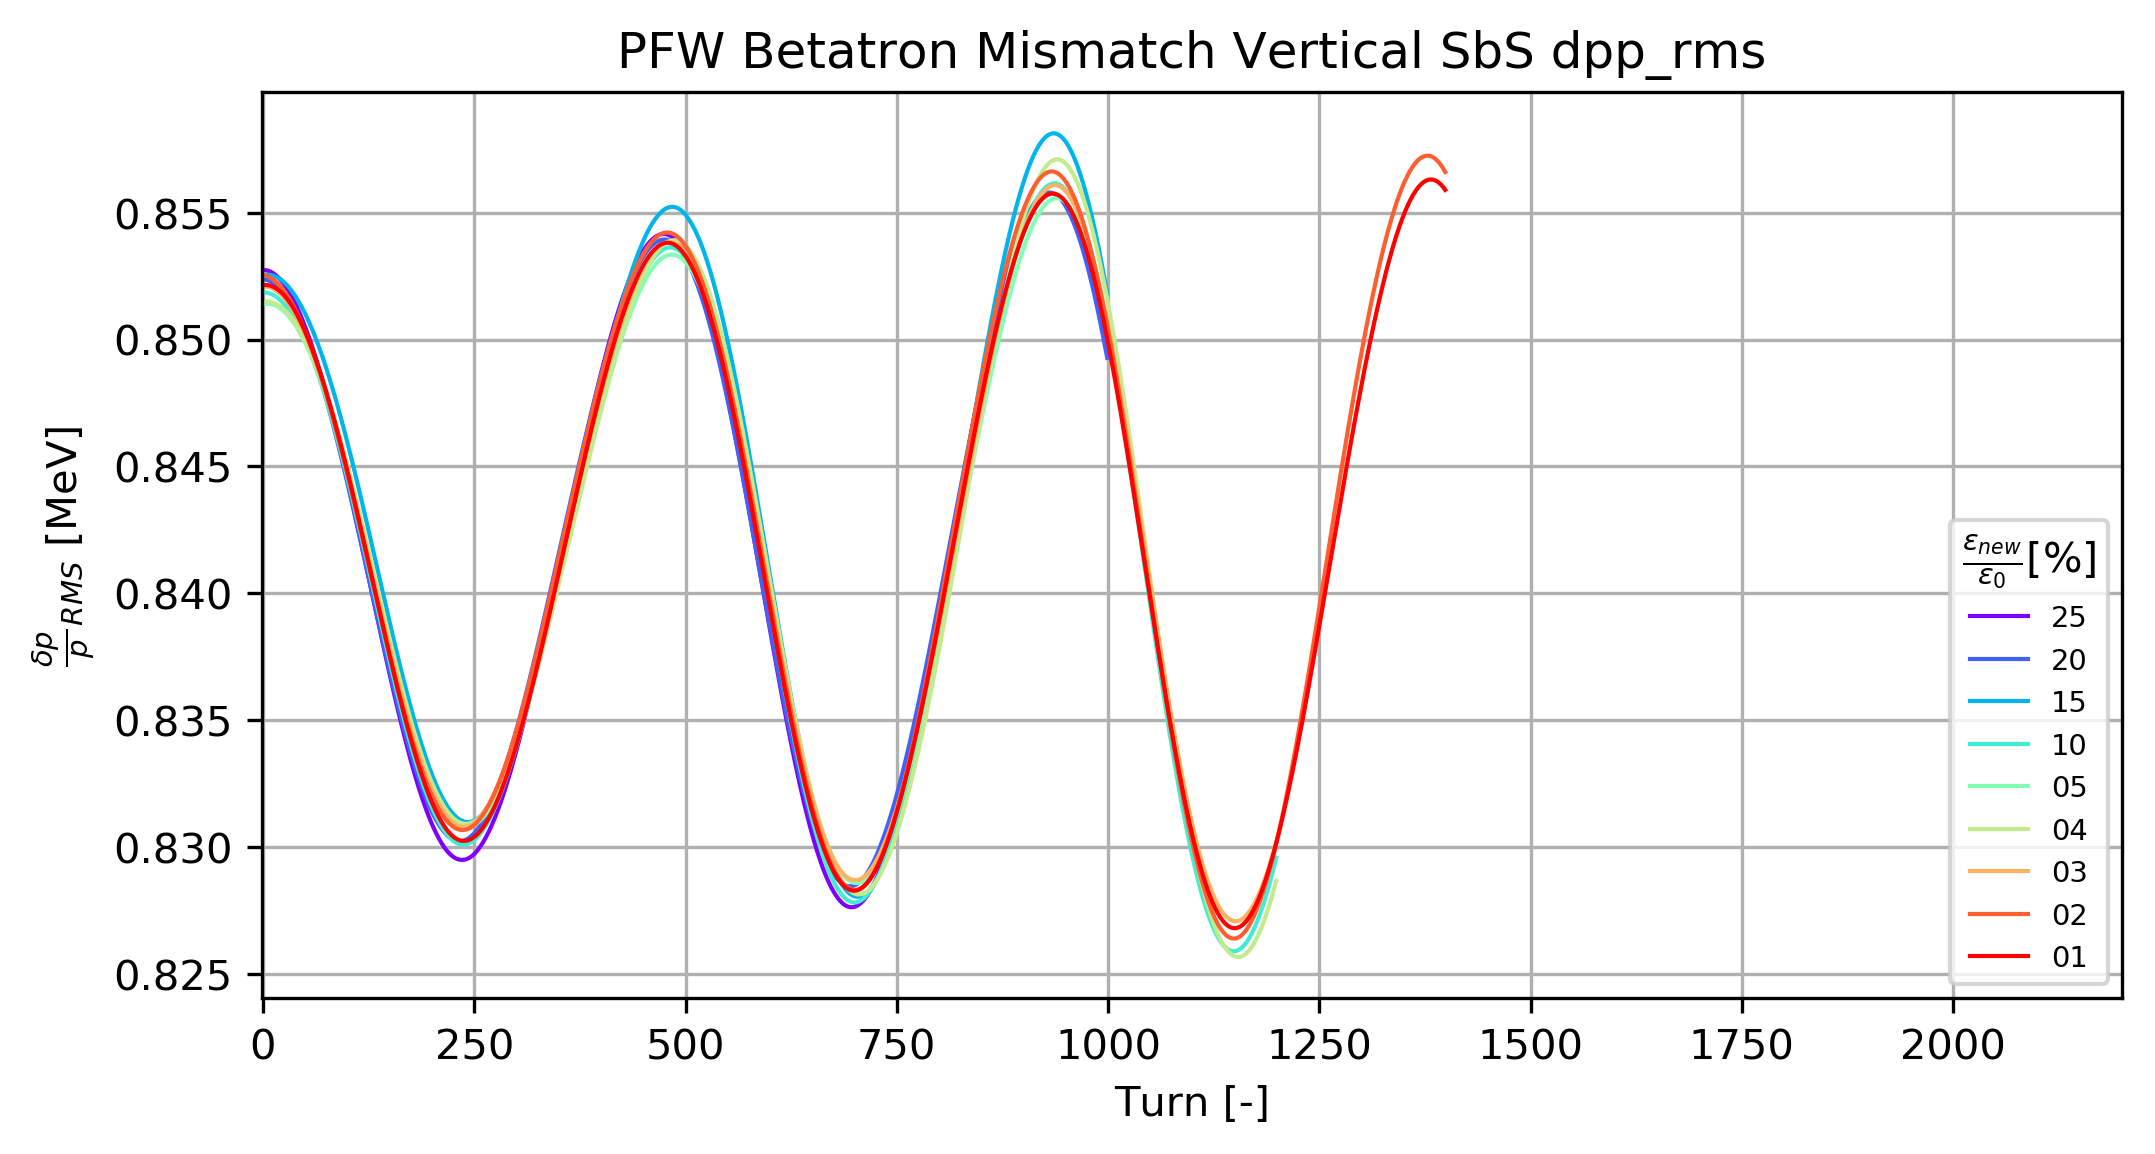

In [13]:
parameter = 'dpp_rms'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [MeV]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
ax1.set_xlim(-1,2200);

savename = Plot_Folder +'/Betatron_' + parameter + '_V.png'
plt.savefig(savename, dpi = 800);

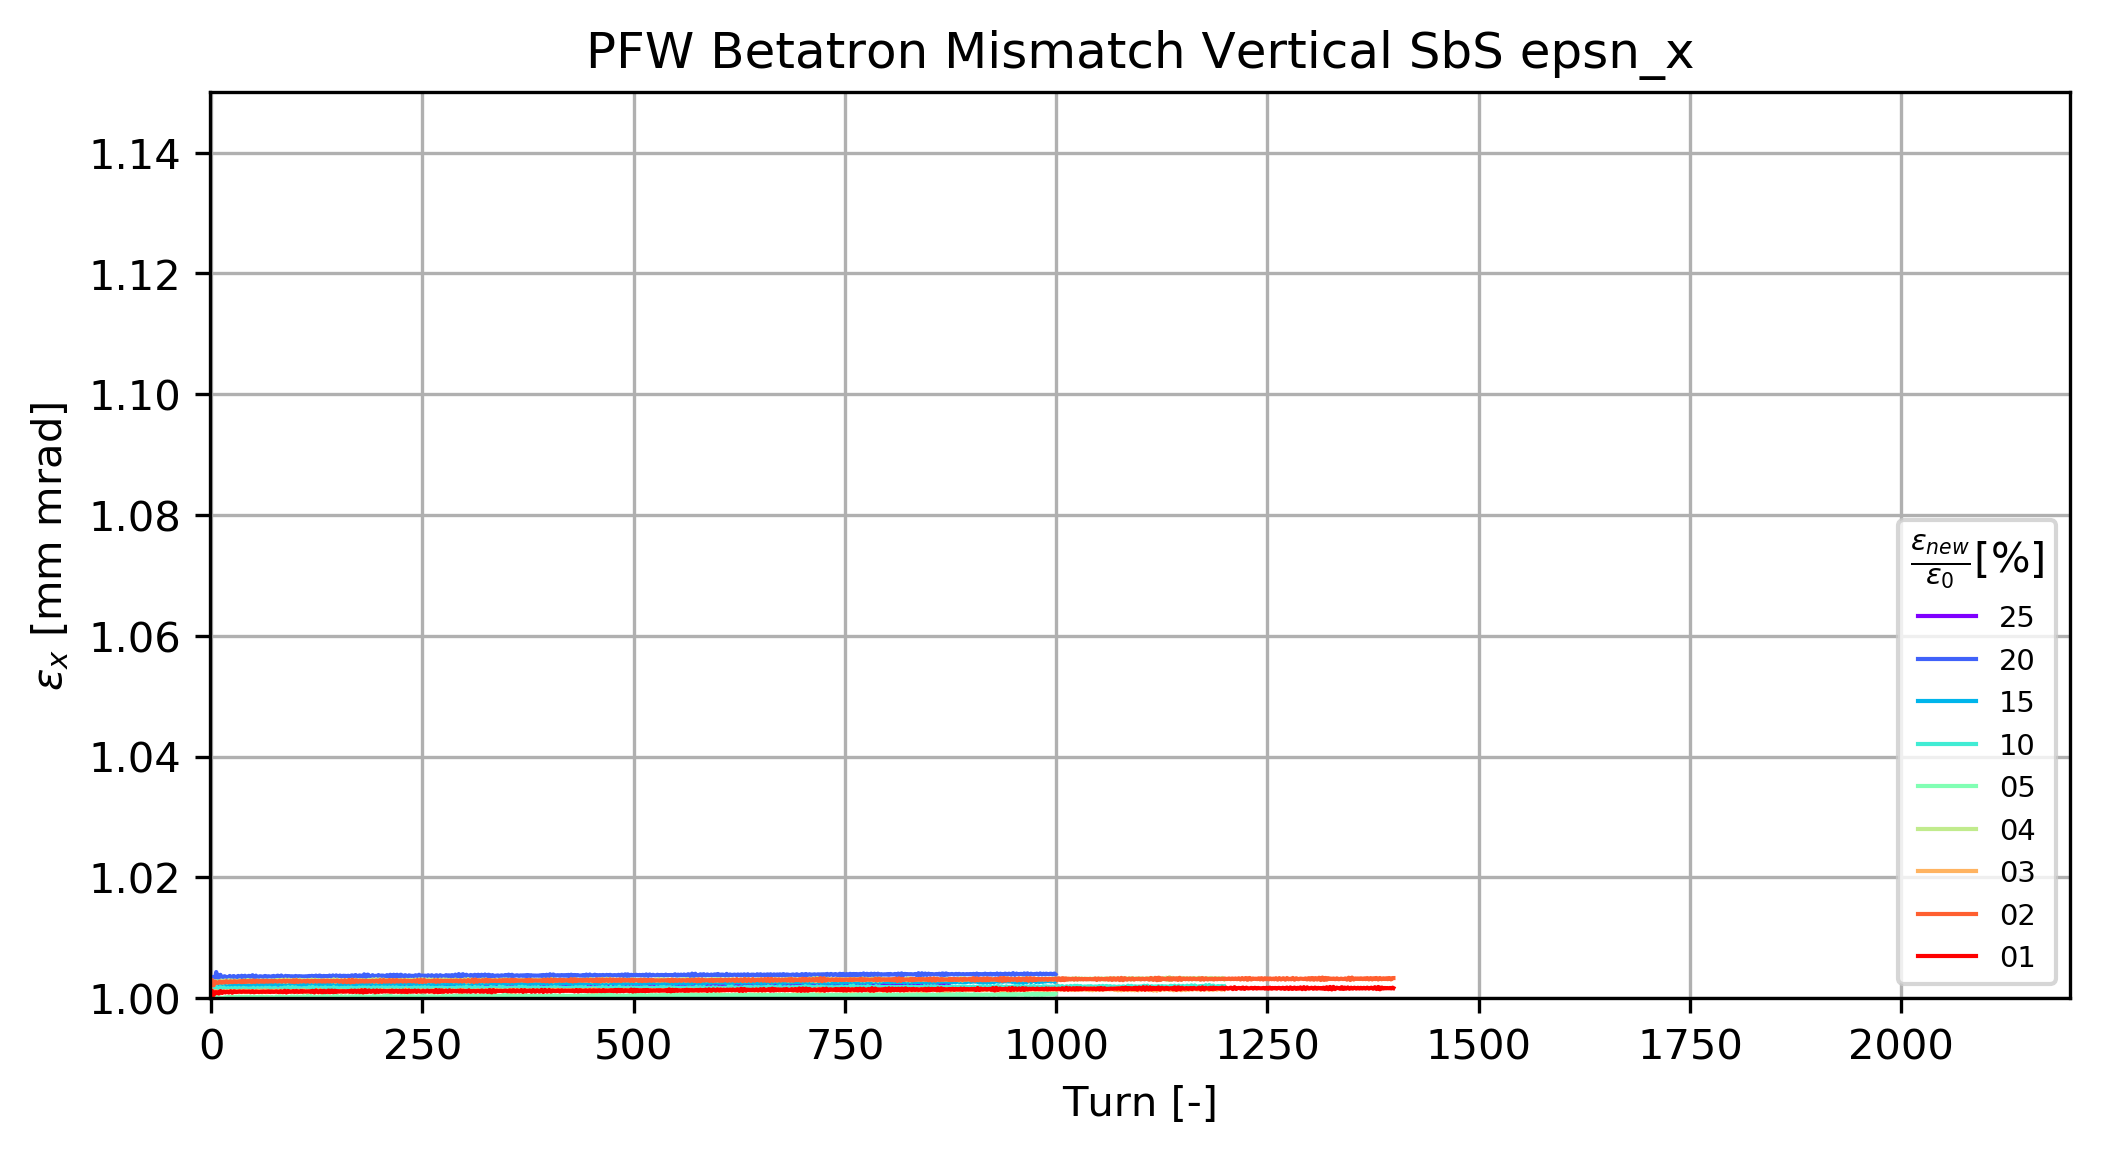

In [14]:
parameter = 'epsn_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
ax1.set_xlim(-1,2200);
ax1.set_ylim(1., 1.15)

savename = Plot_Folder +'/Betatron_' + parameter + '_V.png'
plt.savefig(savename, dpi = 800);

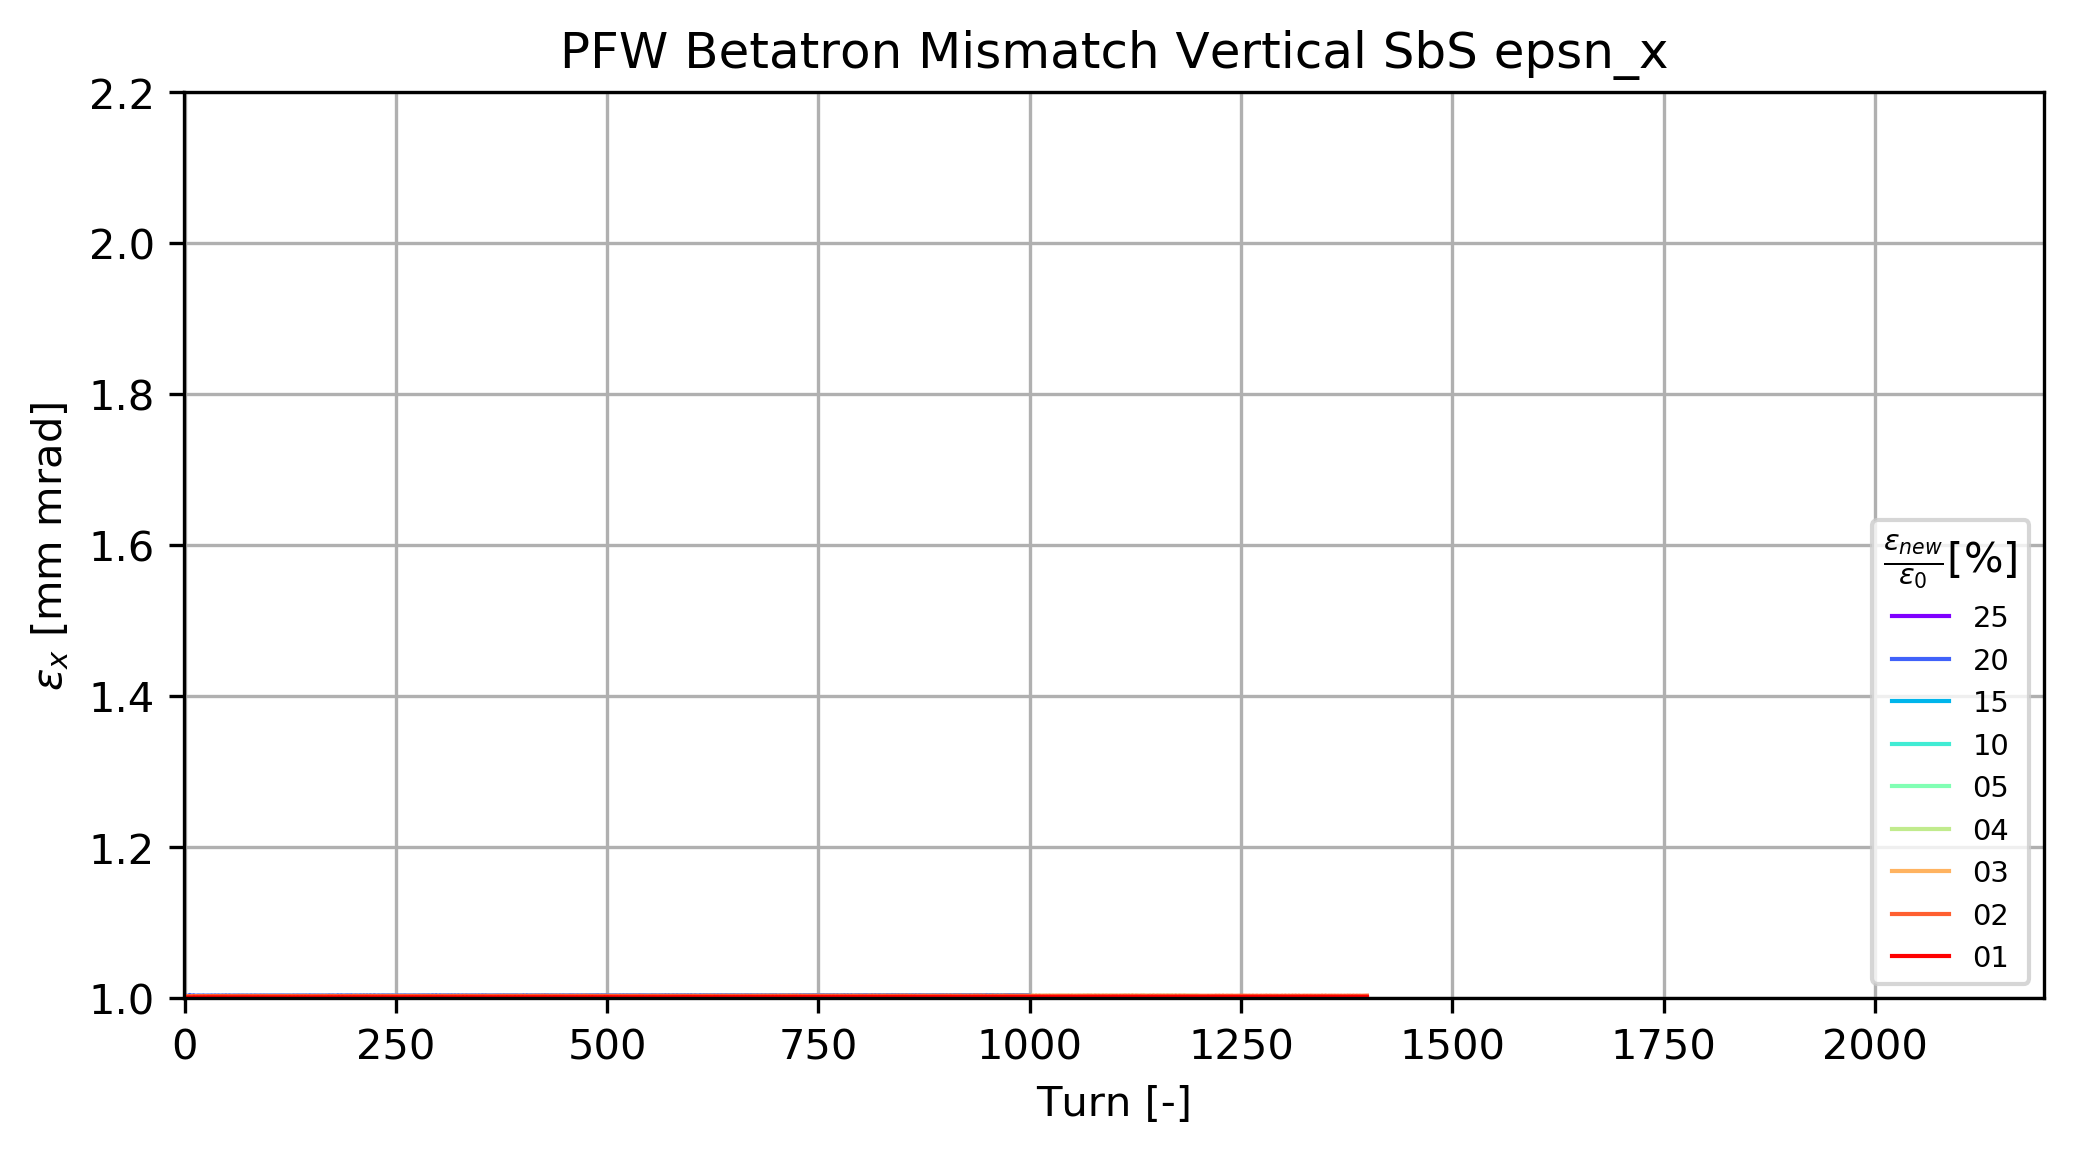

In [15]:
parameter = 'epsn_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
ax1.set_xlim(-1,2200);
ax1.set_ylim(1., 2.2)

savename = Plot_Folder +'/Betatron_' + parameter + '_scaled_V.png'
plt.savefig(savename, dpi = 800);

25 % Beta-beating = Emittance growth  23.54
20 % Beta-beating = Emittance growth  18.93
15 % Beta-beating = Emittance growth  13.76
10 % Beta-beating = Emittance growth  9.28
05 % Beta-beating = Emittance growth  4.42
04 % Beta-beating = Emittance growth  3.54
03 % Beta-beating = Emittance growth  2.59
02 % Beta-beating = Emittance growth  1.68
01 % Beta-beating = Emittance growth  0.73


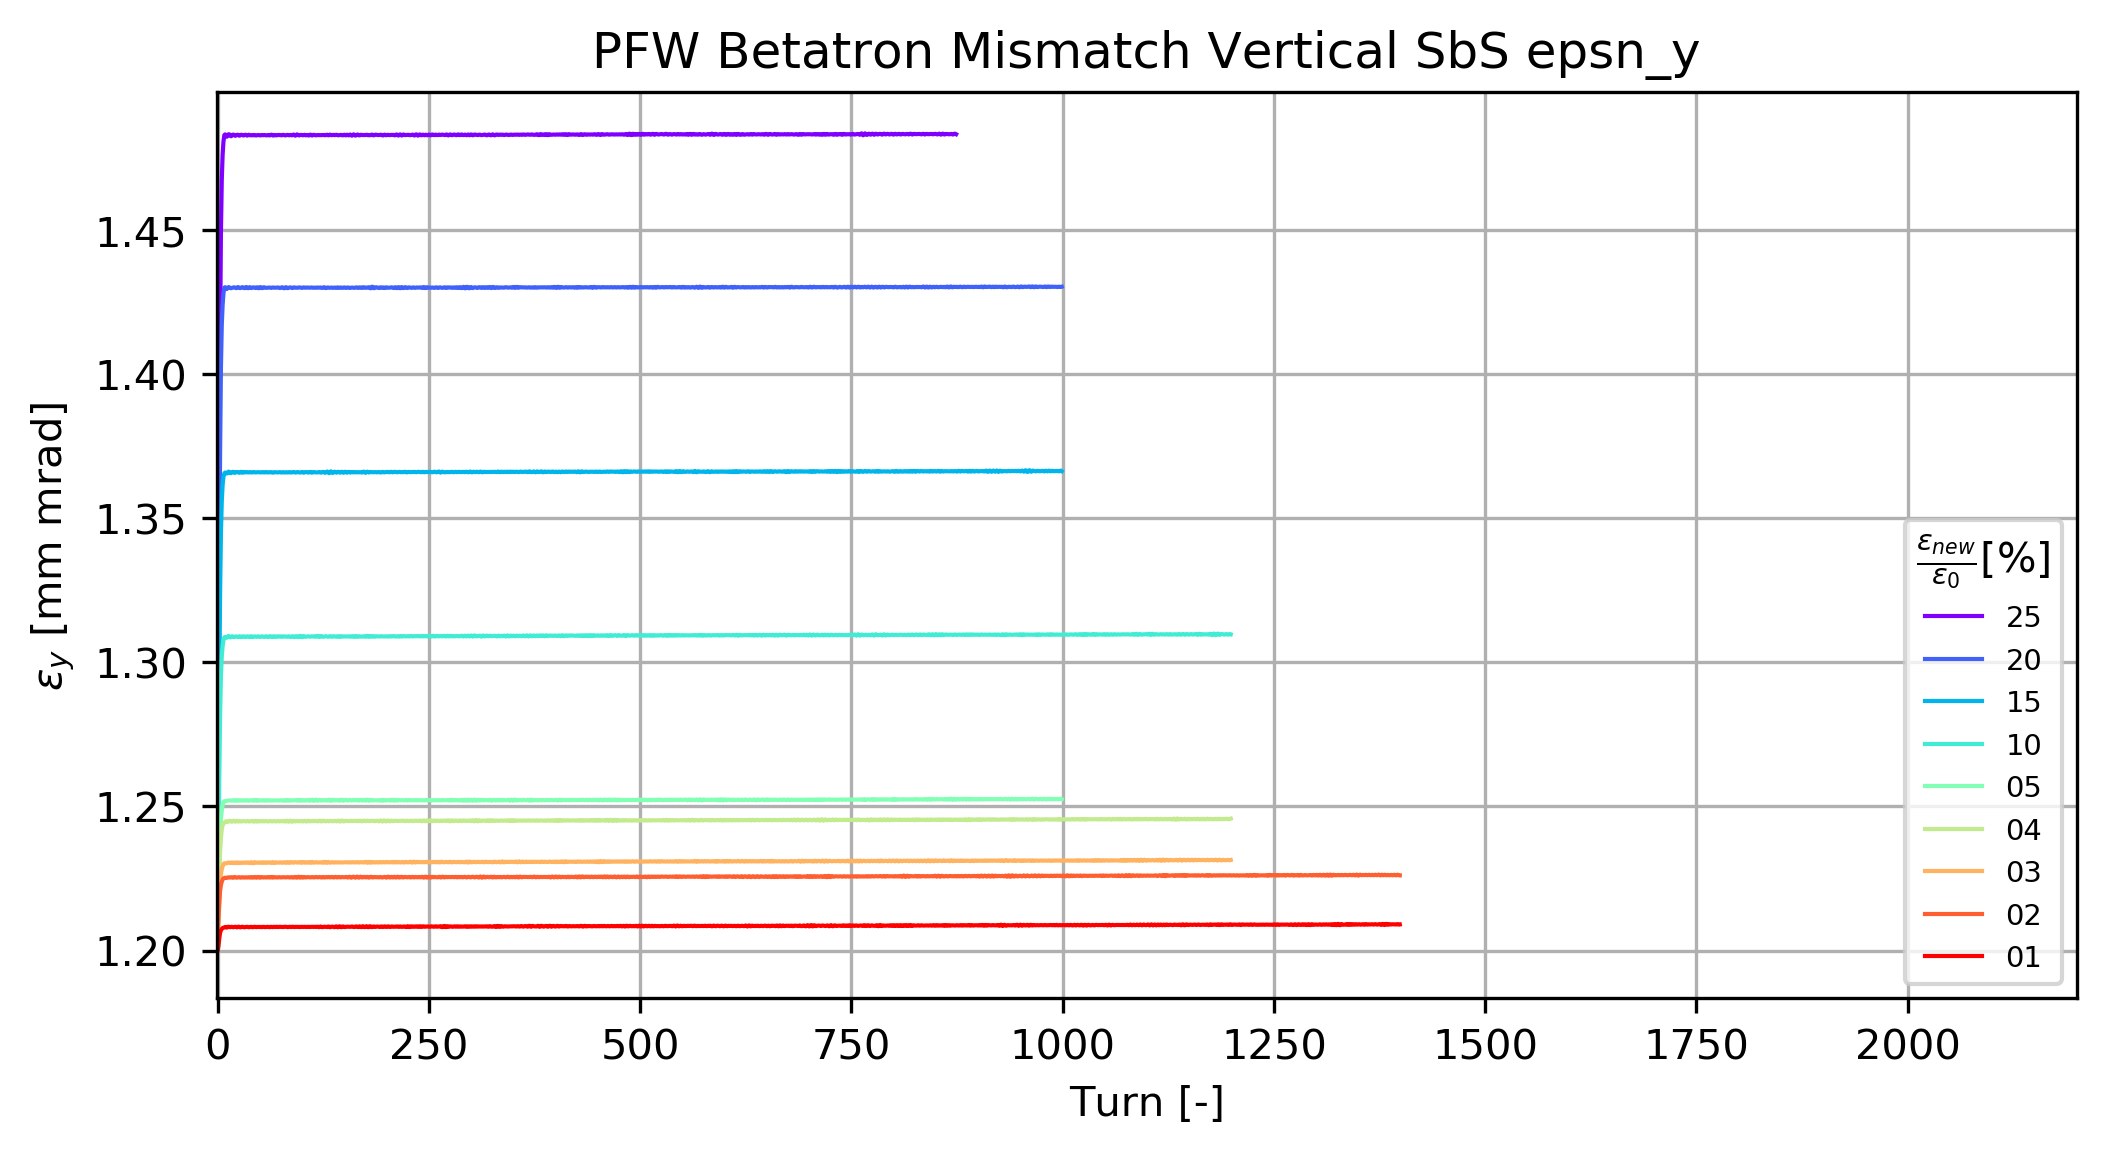

In [26]:
parameter = 'epsn_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        print key, '% Beta-beating = Emittance growth ', round(((np.mean(dd1[key][parameter][0][50])/dd1[key][parameter][0][0])-1)*100, 2)
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
ax1.set_xlim(-1,2200);
#ax1.set_ylim(1, 2.2)

savename = Plot_Folder +'/Betatron_' + parameter + '_V.png'
plt.savefig(savename, dpi = 800);

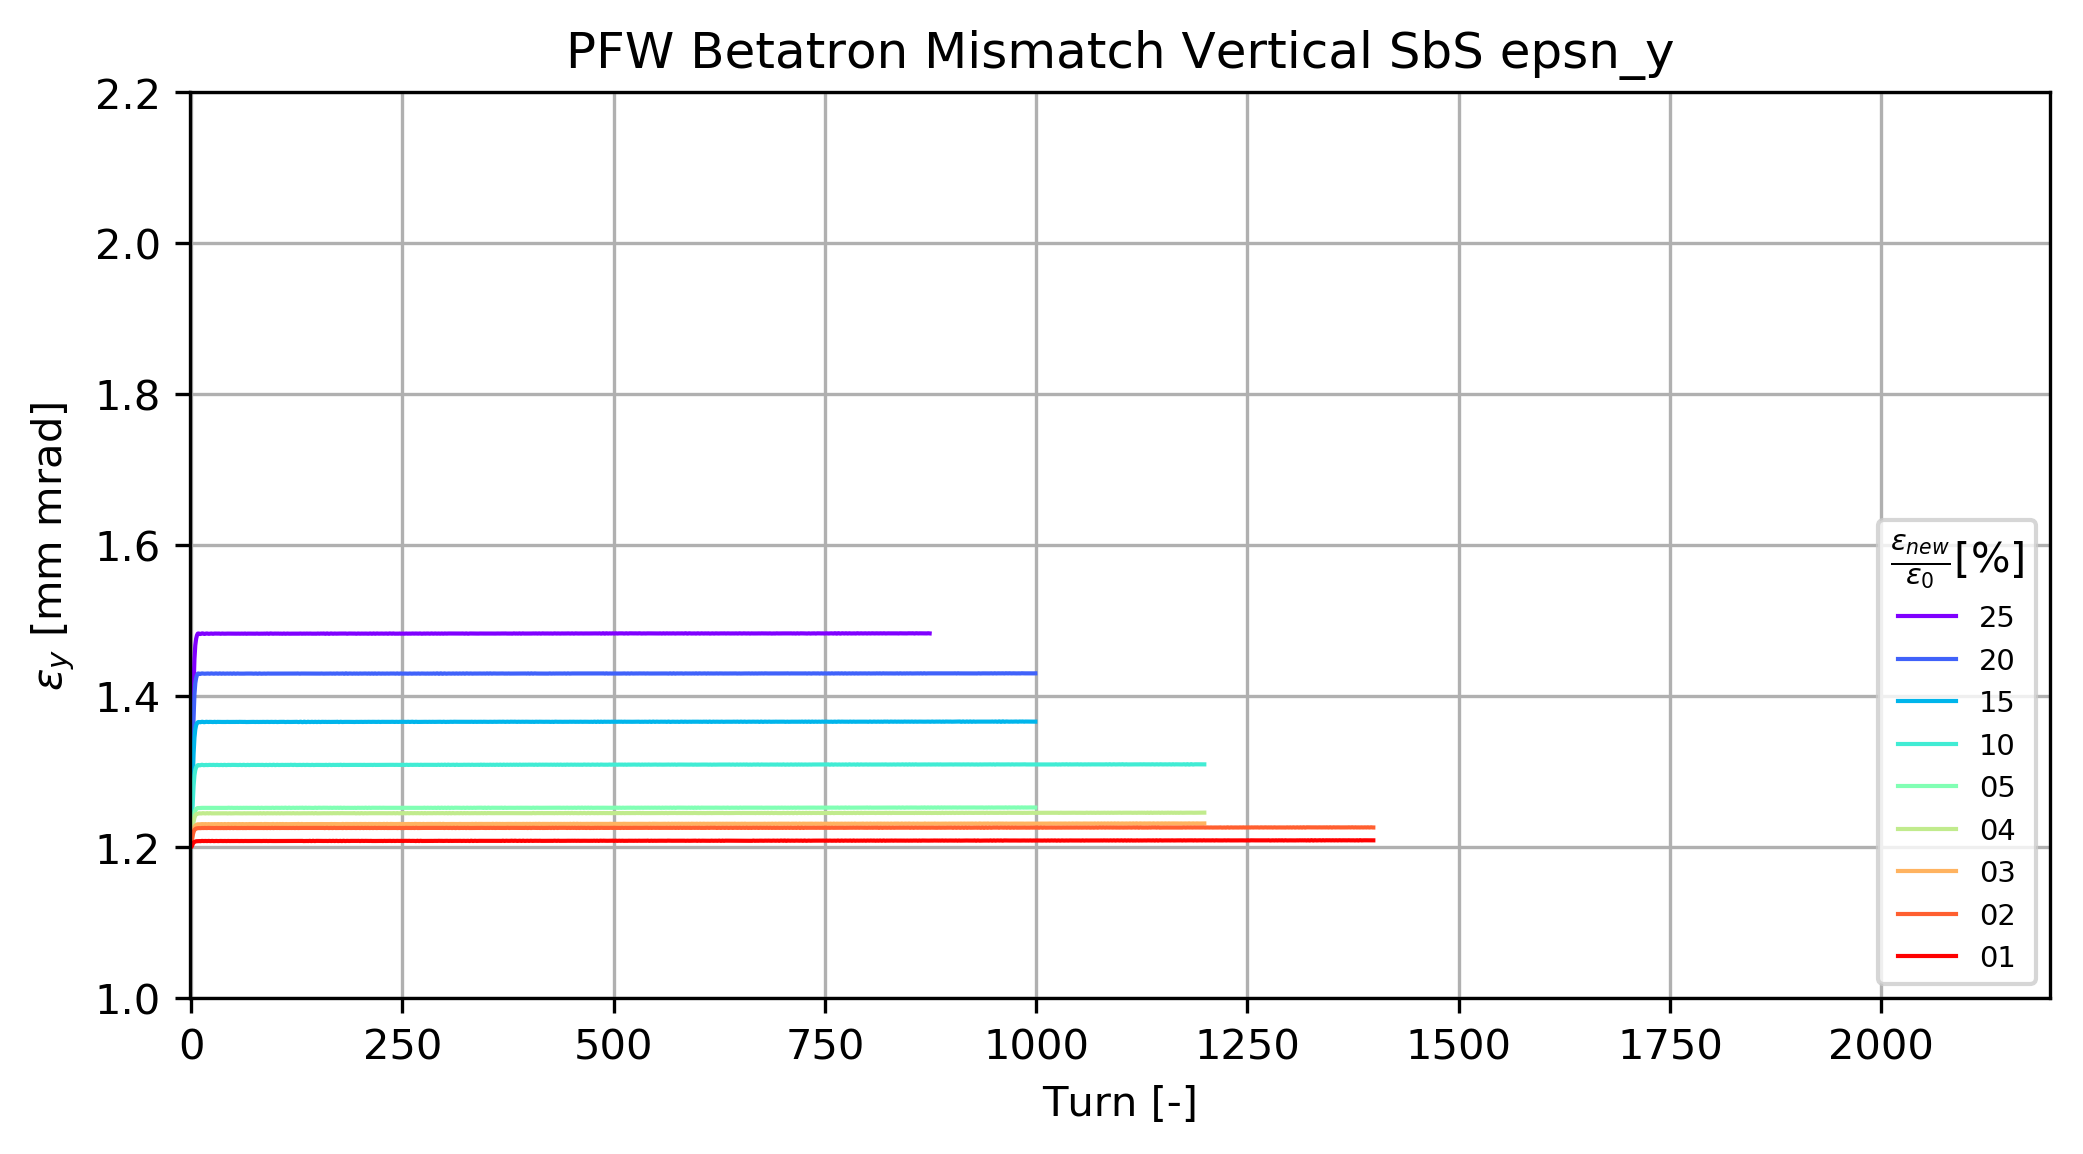

In [17]:
parameter = 'epsn_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
ax1.set_xlim(-1,2200);
ax1.set_ylim(1, 2.2)

savename = Plot_Folder +'/Betatron_' + parameter + '_scaled_V.png'
plt.savefig(savename, dpi = 800);

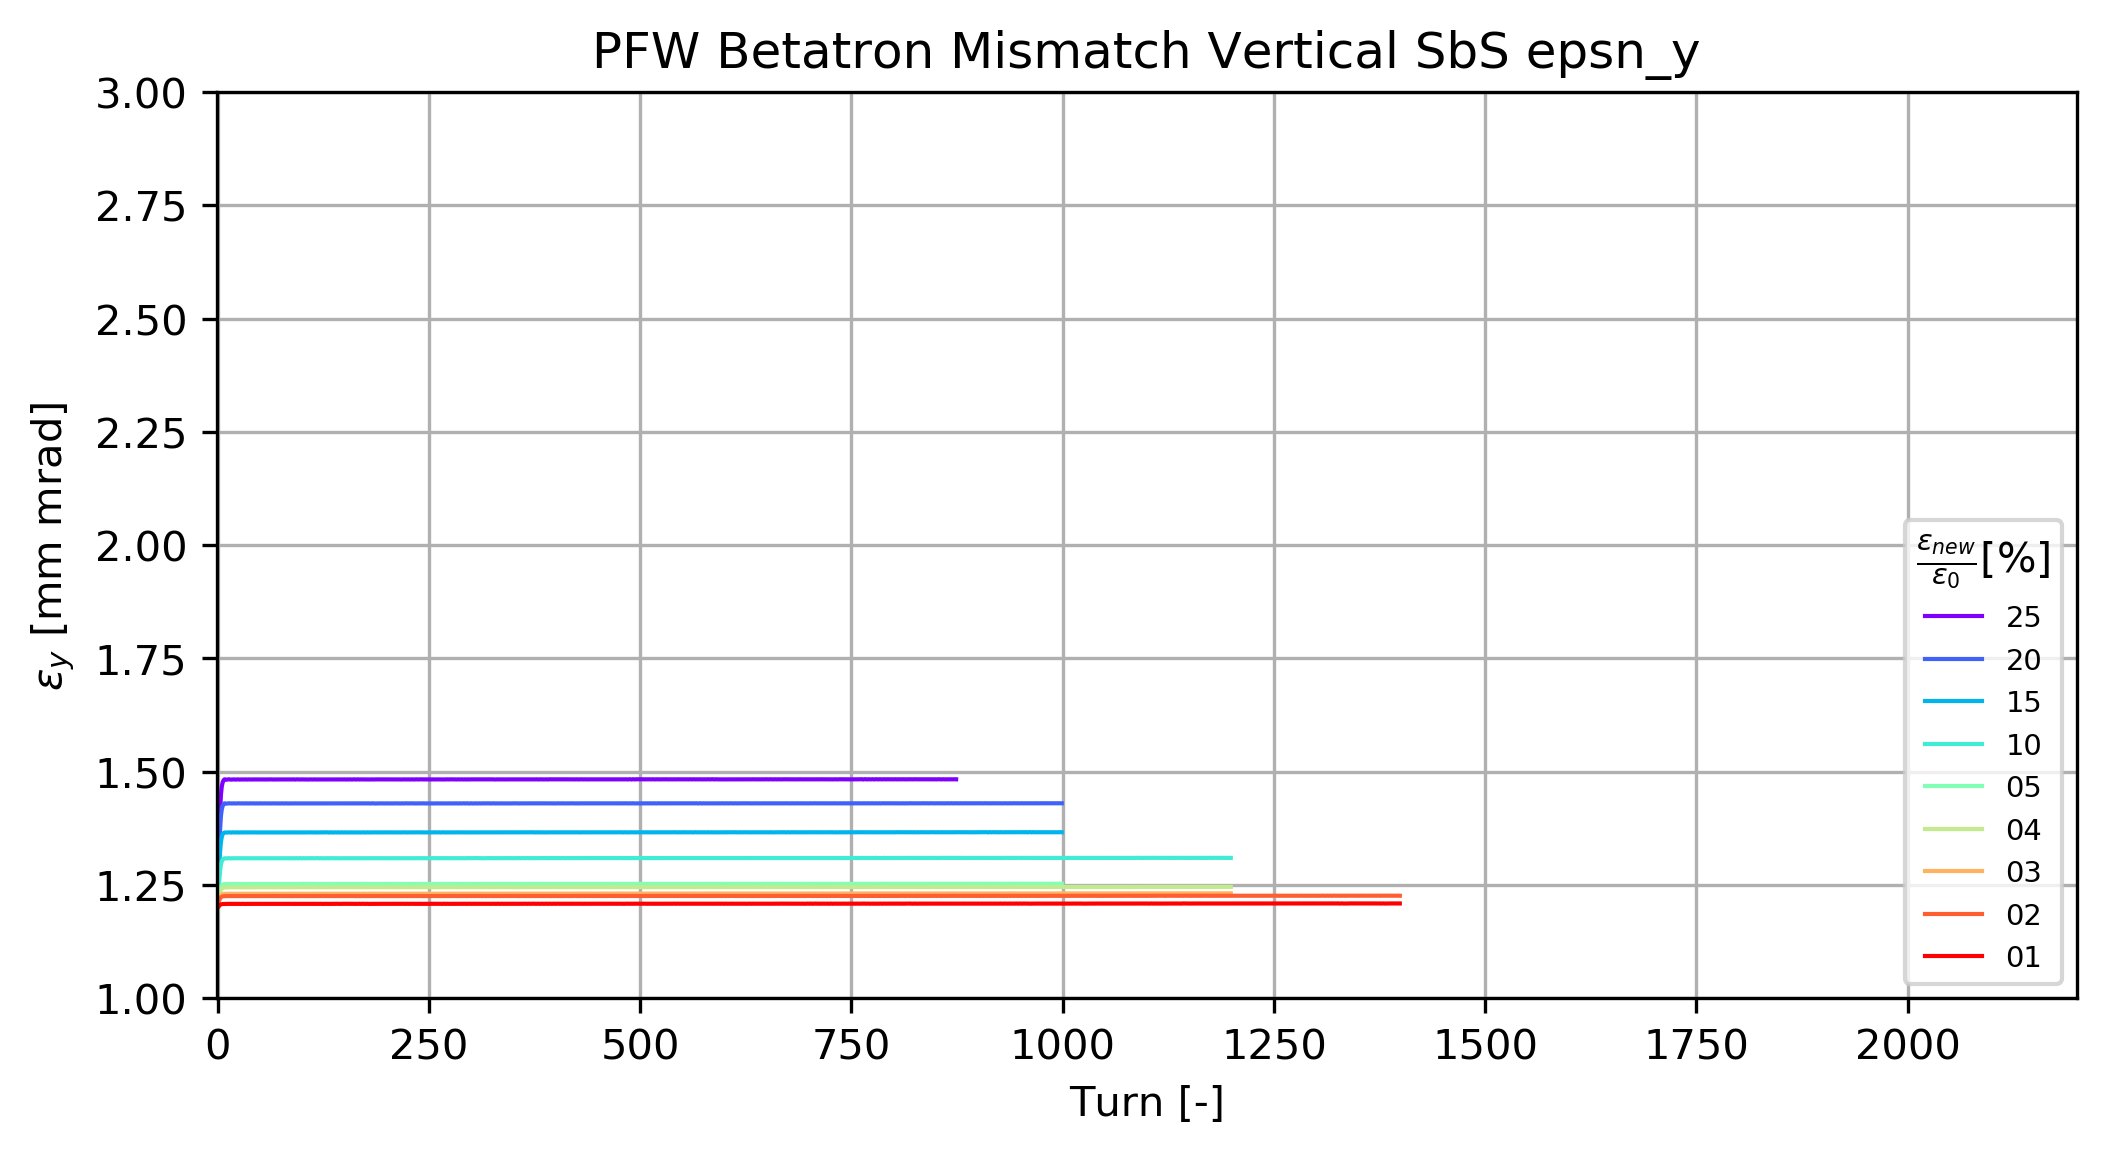

In [18]:
parameter = 'epsn_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
ax1.set_xlim(-1,2200);
ax1.set_ylim(1, 3)

savename = Plot_Folder +'/Betatron_' + parameter + '_scaled2_H.png'
plt.savefig(savename, dpi = 800);

Started loop for tune  25
876
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  20
1001
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  15
1001
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  10
1201
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  05
1001
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  04
1201
Started loop for tune  03
1201
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  02
1401
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  01
1401
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).


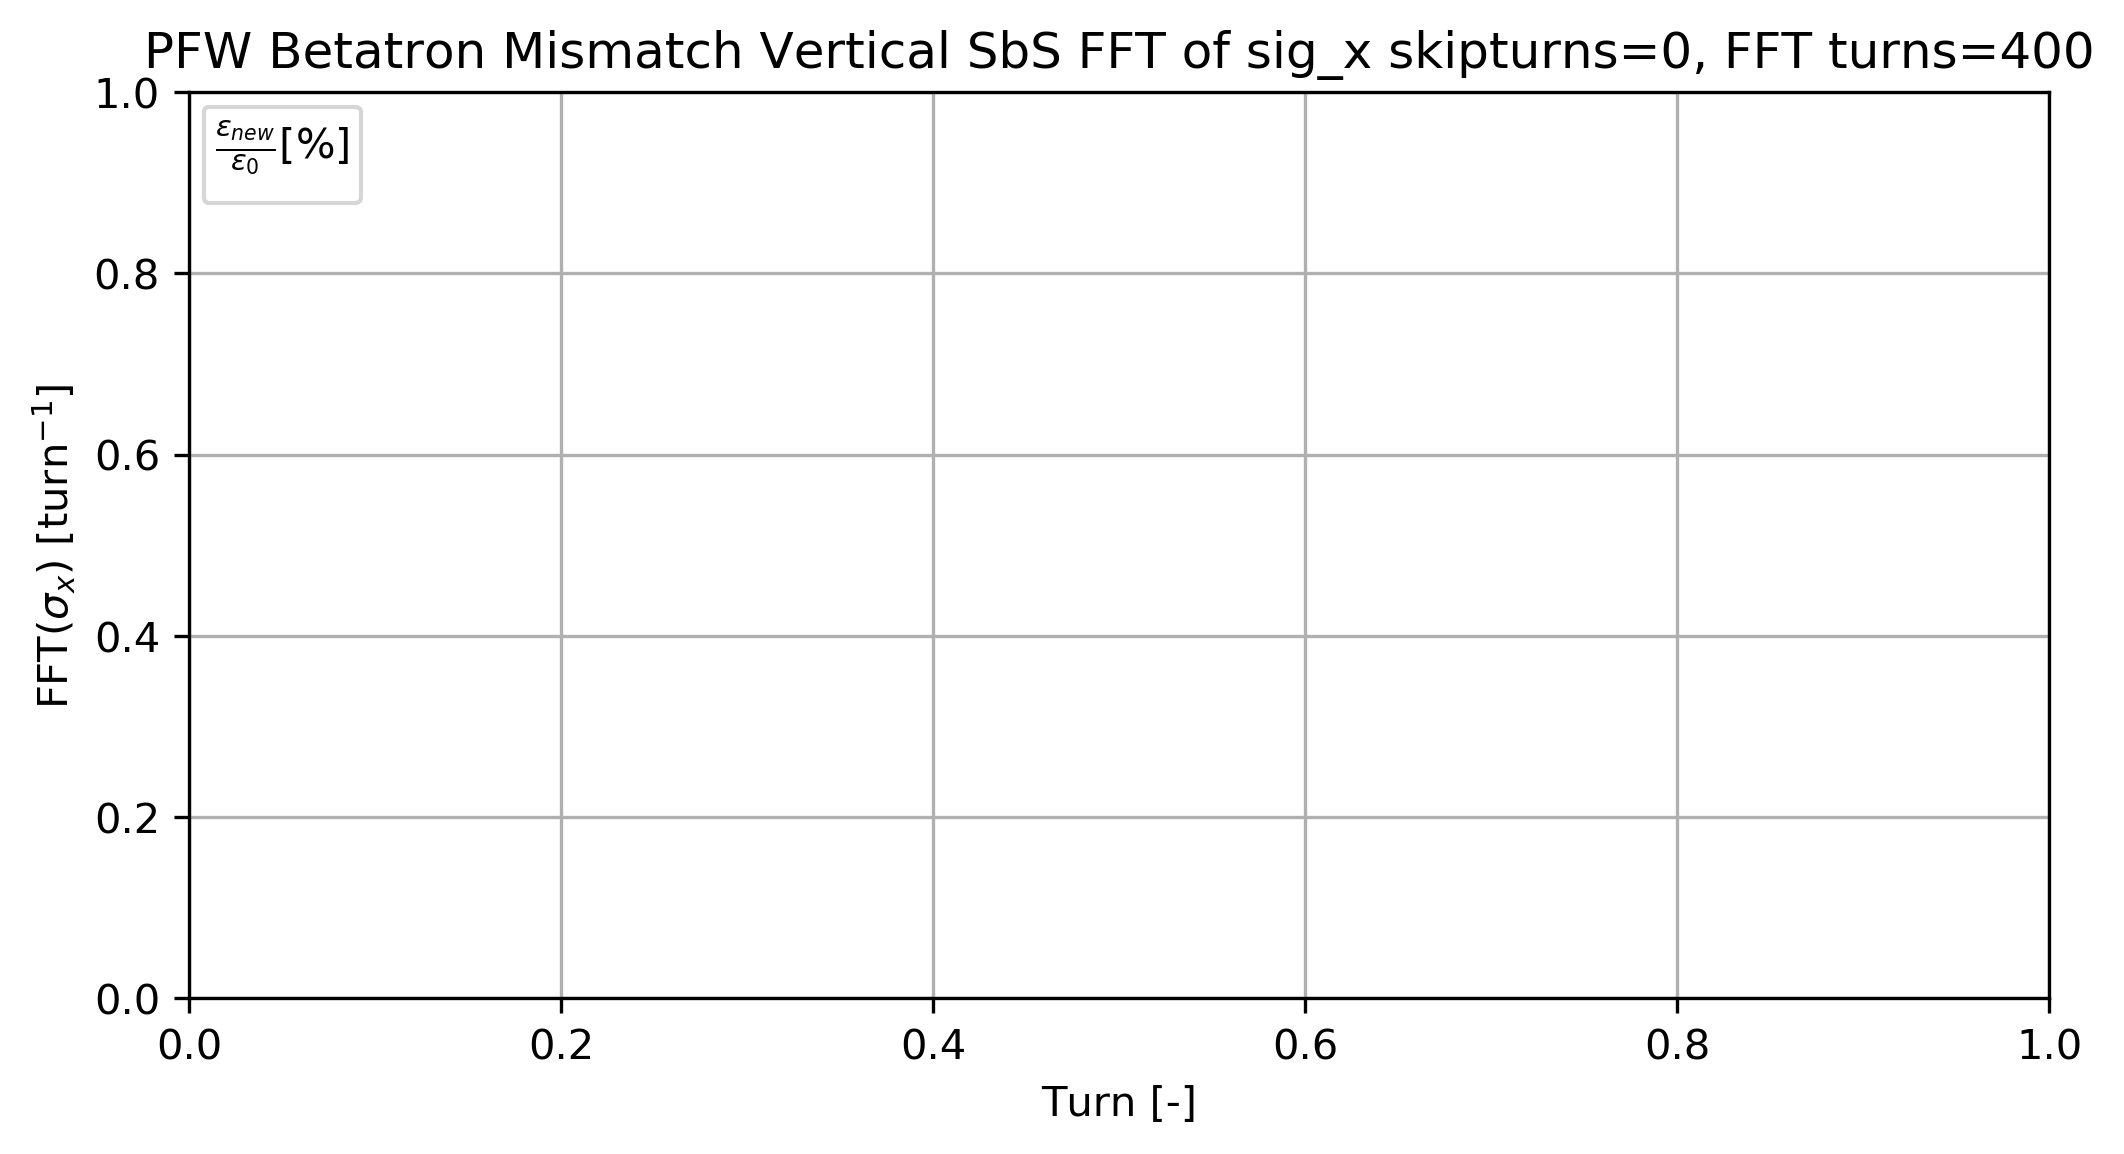

In [19]:
parameter = 'sig_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

trns = 400
skiptrns = 0
tit = main_label + ' ' + sc + ' FFT of ' + parameter + ' skipturns=' +str(skiptrns)+ ', FFT turns=' + str(trns)
ax1.set_title(tit);

ax1.set_ylabel(r'FFT($\sigma_x$) [turn$^{-1}$]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
    print 'Started loop for tune ', key
    y = (dd1[key][parameter][0]-np.mean(dd1[key][parameter][0]))
    print len(y)
    try:
        freq = pnf.naff(y, turns=trns, nterms=1, skipTurns=skiptrns, getFullSpectrum=False, window=1)[0][1]
        ax1.scatter(float(key), freq, label=str(key), color=colors[c_it])
    except IndexError:
        continue    
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=2, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,50)

#savename = Plot_Folder +'/Betatron_' + parameter + '_H.png'
#plt.savefig(savename, dpi = 800);

Started loop for tune  25
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  20
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  15
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  10
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  05
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  04
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  03
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  02
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  01
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).


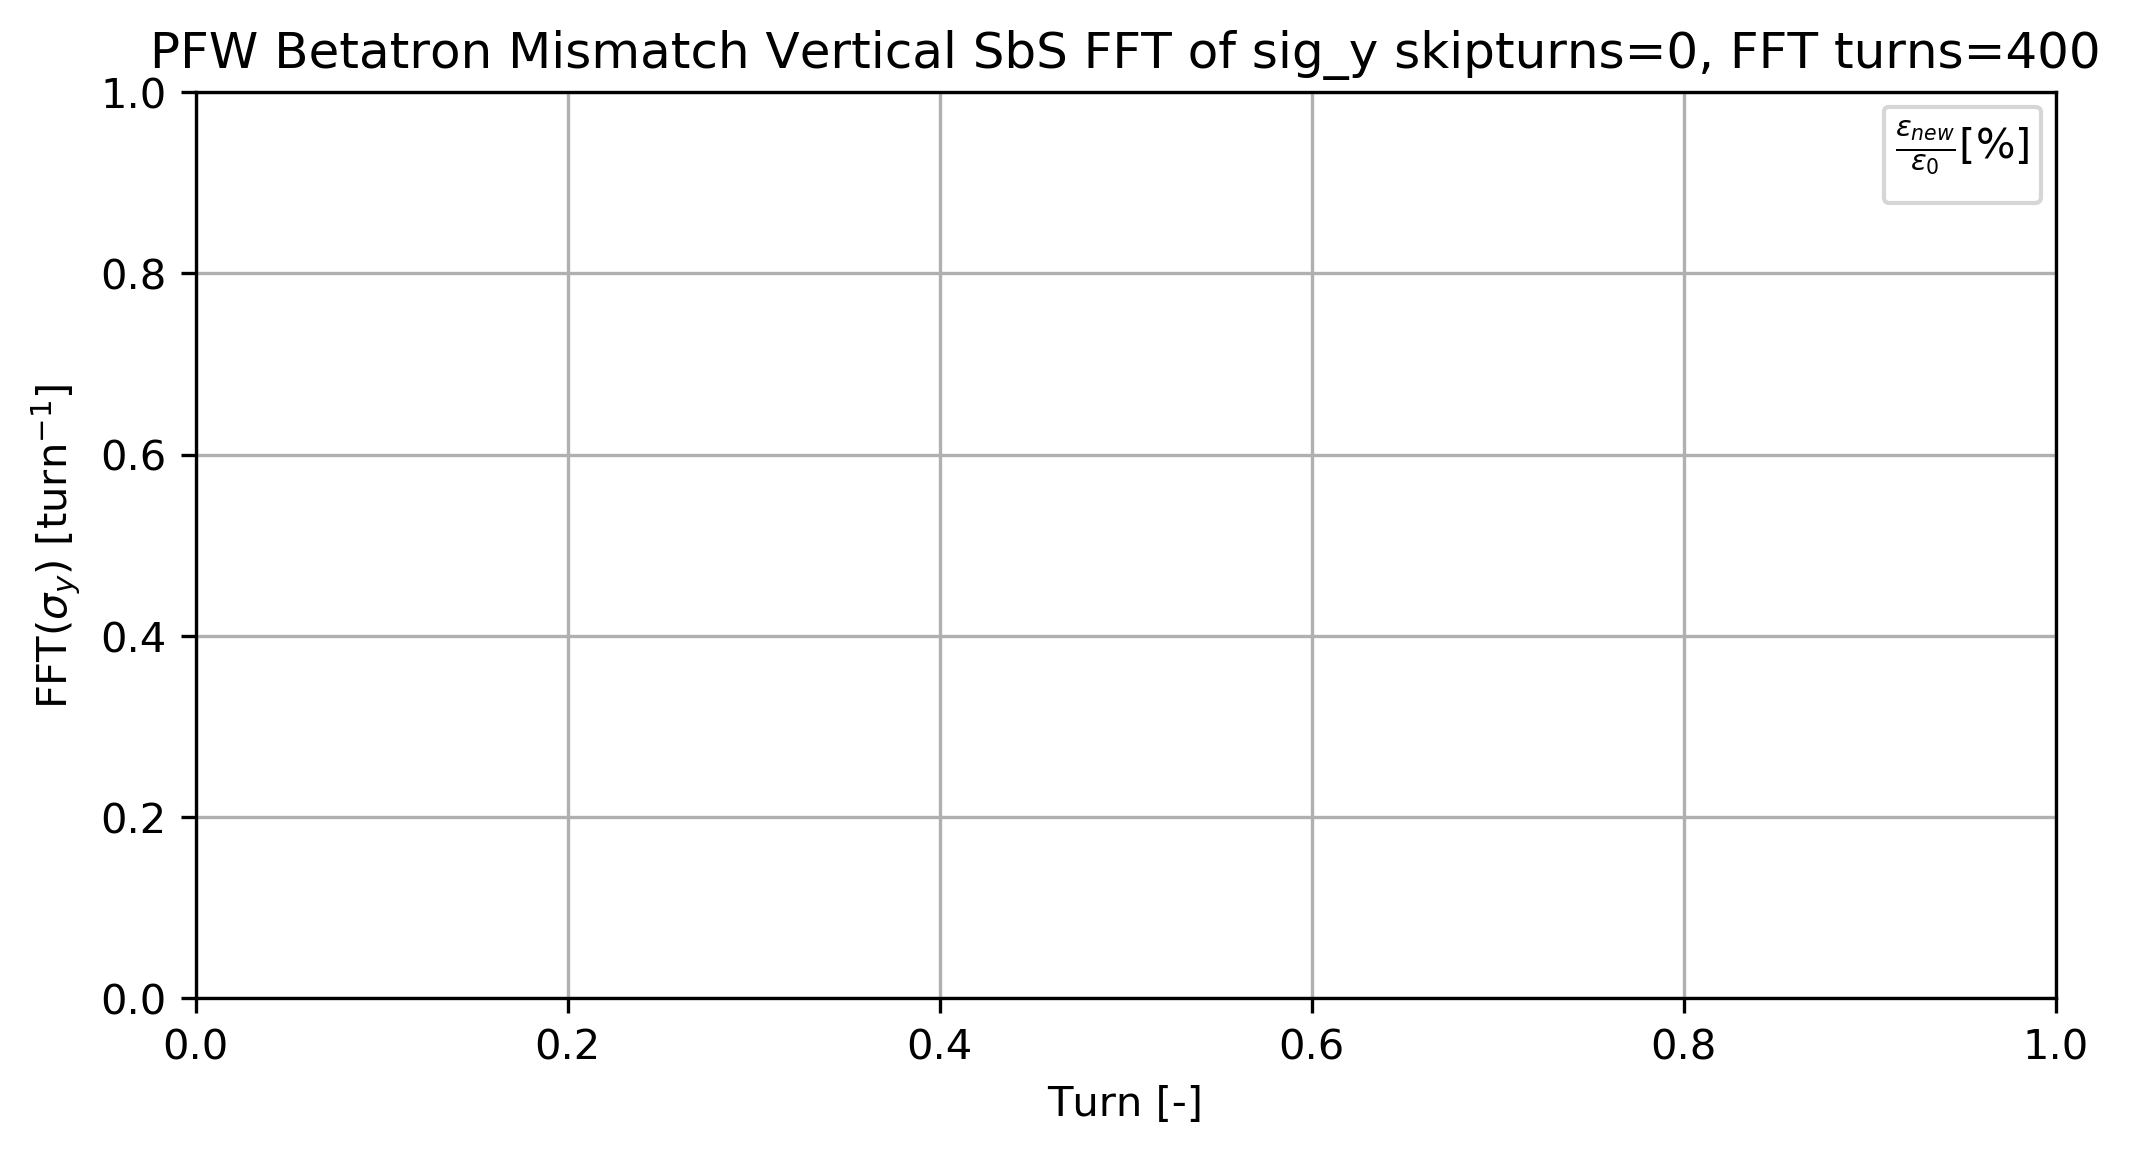

In [20]:
parameter = 'sig_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

trns = 400
skiptrns = 0
tit = main_label + ' ' + sc + ' FFT of ' + parameter + ' skipturns=' +str(skiptrns)+ ', FFT turns=' + str(trns)
ax1.set_title(tit);

ax1.set_ylabel(r'FFT($\sigma_y$) [turn$^{-1}$]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
    print 'Started loop for tune ', key
    y = (dd1[key][parameter][0]-np.mean(dd1[key][parameter][0]))
    try:
        freq = pnf.naff(y, turns=trns, nterms=1, skipTurns=skiptrns, getFullSpectrum=False, window=1)[0][1]
        ax1.scatter(float(key), freq, label=str(key), color=colors[c_it])
    except IndexError:
        continue    
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=1, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,50)

#savename = 'Plots_H_NoSC/Betatron_' + parameter + '_H_NoSC_period.png'
#plt.savefig(savename, dpi = 800);

In [21]:
Q3 = []
Dx3 = []
Dy3 = []
Bx3 = []
By3 = []
Ax3 = []
Ay3 = []
start = 200 # for SC sims we ignore the first n turns

for key, value in sorted(dd1.iteritems()):
    Q3.append(float(key))
    Dx3.append(np.mean(dd1[key]['D_x'][0][start:]))
    Dy3.append(np.mean(dd1[key]['D_y'][0][start:]))
    Bx3.append(np.mean(dd1[key]['beta_x'][0][start:]))
    By3.append(np.mean(dd1[key]['beta_y'][0][start:]))
    Ax3.append(np.mean(dd1[key]['alpha_x'][0][start:]))
    Ay3.append(np.mean(dd1[key]['alpha_y'][0][start:]))

print '\nHorizontal'
print '\nQ_x_V = ', Q3
print '\nDx_V = ', Dx3
print '\nDy_V = ', Dy3
print '\nBeta_x_V = ', Bx3
print '\nBeta_y_V = ', By3
print '\nAlpha_x_V = ', Ax3
print '\nAlpha_y_V = ', Ay3


Horizontal

Q_x_V =  [1.0, 2.0, 3.0, 4.0, 5.0, 10.0, 15.0, 20.0, 25.0]

Dx_V =  [2.4082286475359673, 2.4079671329494974, 2.4079693751706785, 2.407786957501615, 2.4079065030358664, 2.4074205478673574, 2.4068635432778924, 2.4064880141520715, 2.406194357540195]

Dy_V =  [-0.0001600475783893371, 0.0005932523051672839, -0.0005130501975813475, -7.827507850786142e-05, 0.0008651305423625073, 0.0006902450599585009, 0.0010035251579513574, 0.00011101759417008339, 0.0009493944876910997]

Beta_x_V =  [12.885775348645122, 12.885166235752088, 12.88535601091208, 12.884834262844214, 12.885464336471083, 12.88410856915954, 12.883002478621922, 12.882028085606178, 12.8810362268675]

Beta_y_V =  [22.77855322805832, 22.7751413431918, 22.76995120357077, 22.768971754063895, 22.764162432895606, 22.753348010539437, 22.739032572778935, 22.726045989991054, 22.72008207344389]

Alpha_x_V =  [-0.015619981267605209, -0.015595646765815218, -0.015602749665711832, -0.015580059645480123, -0.015602096824308995, -0.0155843

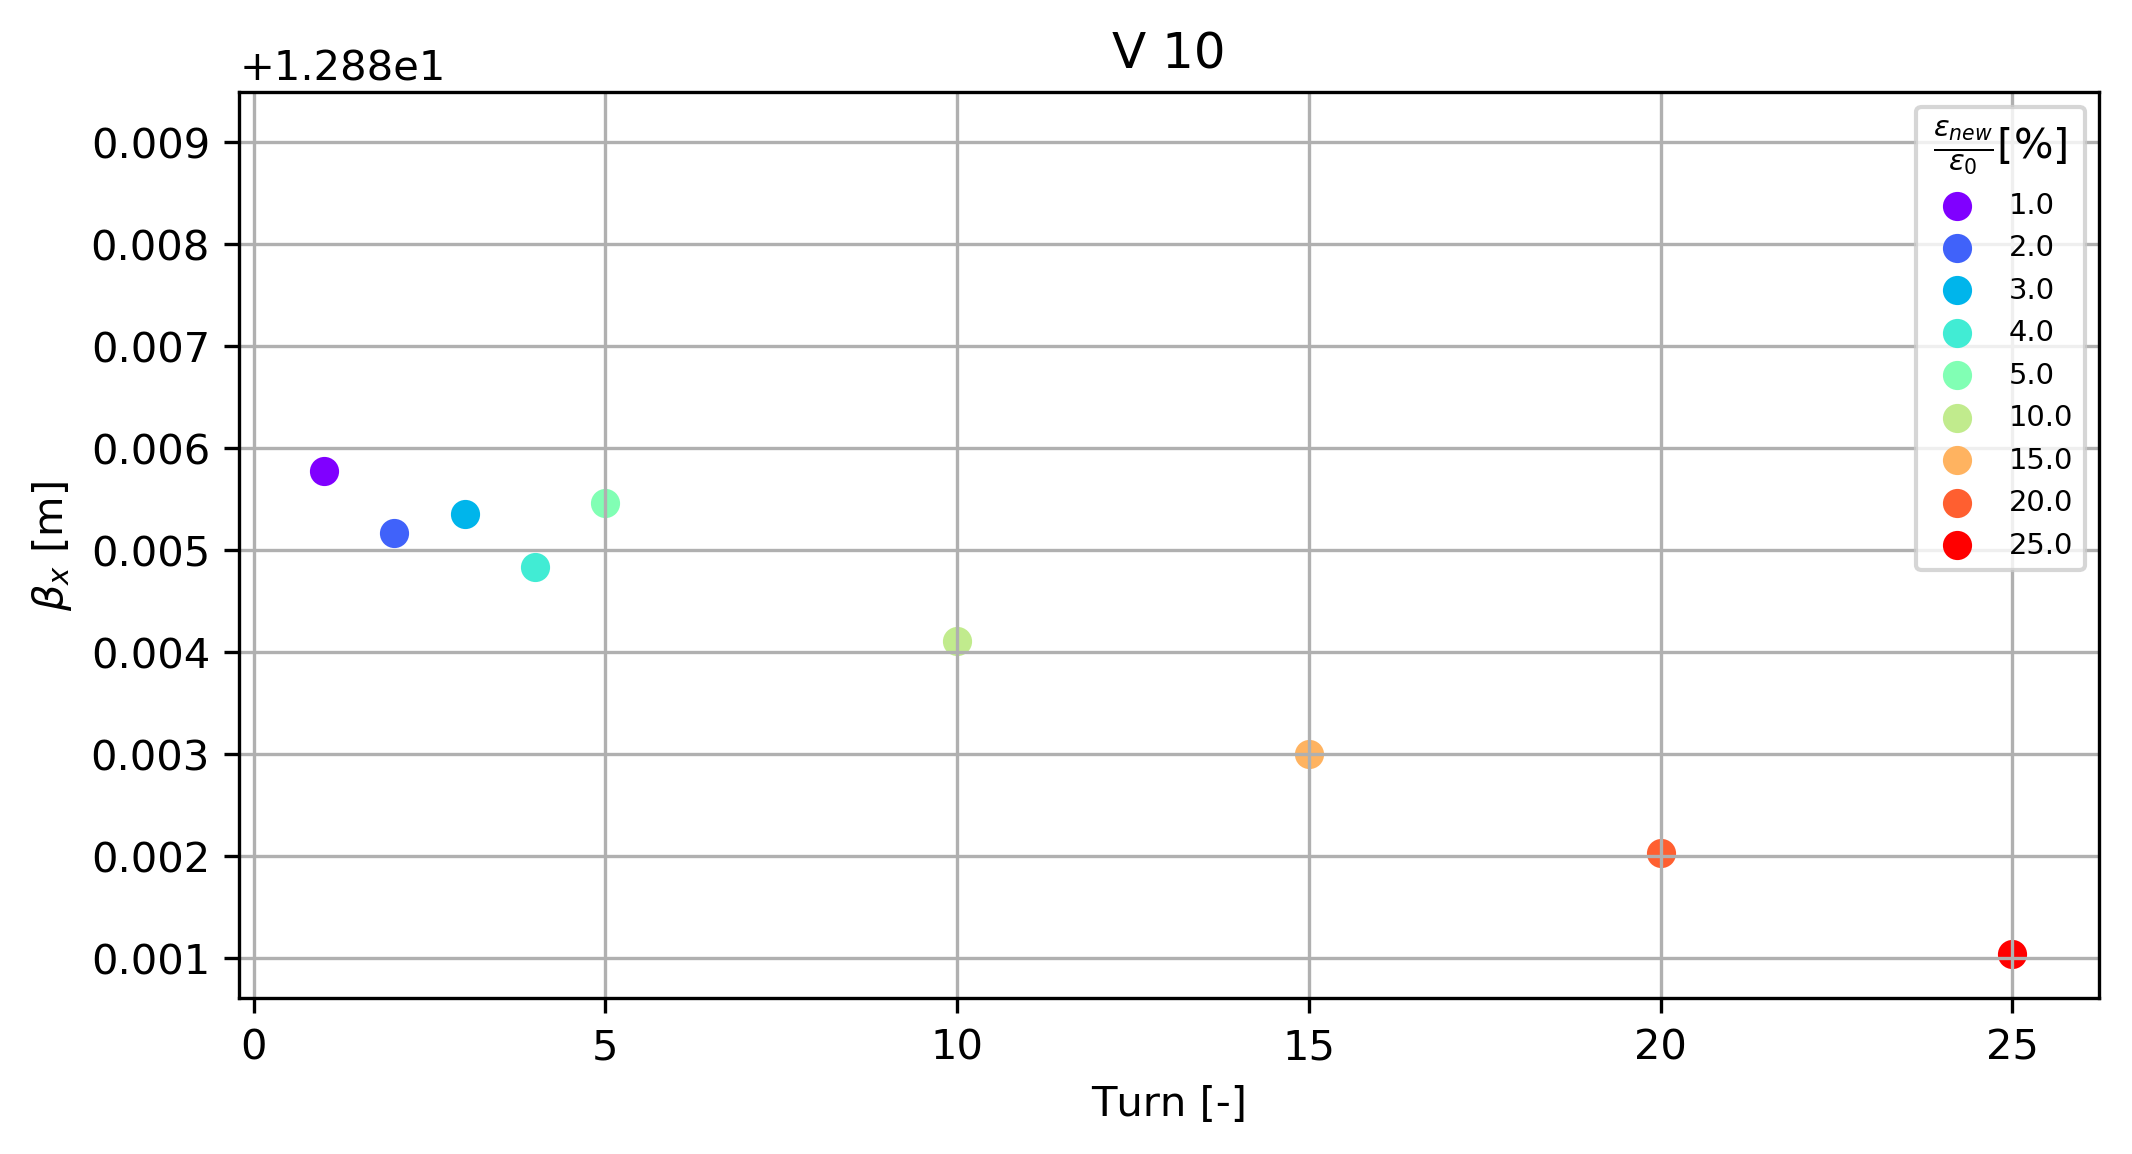

In [22]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title('V 10');

ax1.set_ylabel(r'$\beta_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(Q3)))
c_it = int(0)


for i in range(len(Q3)):
    ax1.scatter(Q3[i], Bx3[i], label=Q3[i], color=colors[c_it]);
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=1, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,2200)
#ax1.set_ylim(16, 23)

#savename = 'Plots_H/' + parameter + '_H.png'
plt.savefig(str(Plot_Folder +'/Horizontal_Betas.png'), dpi = 800);

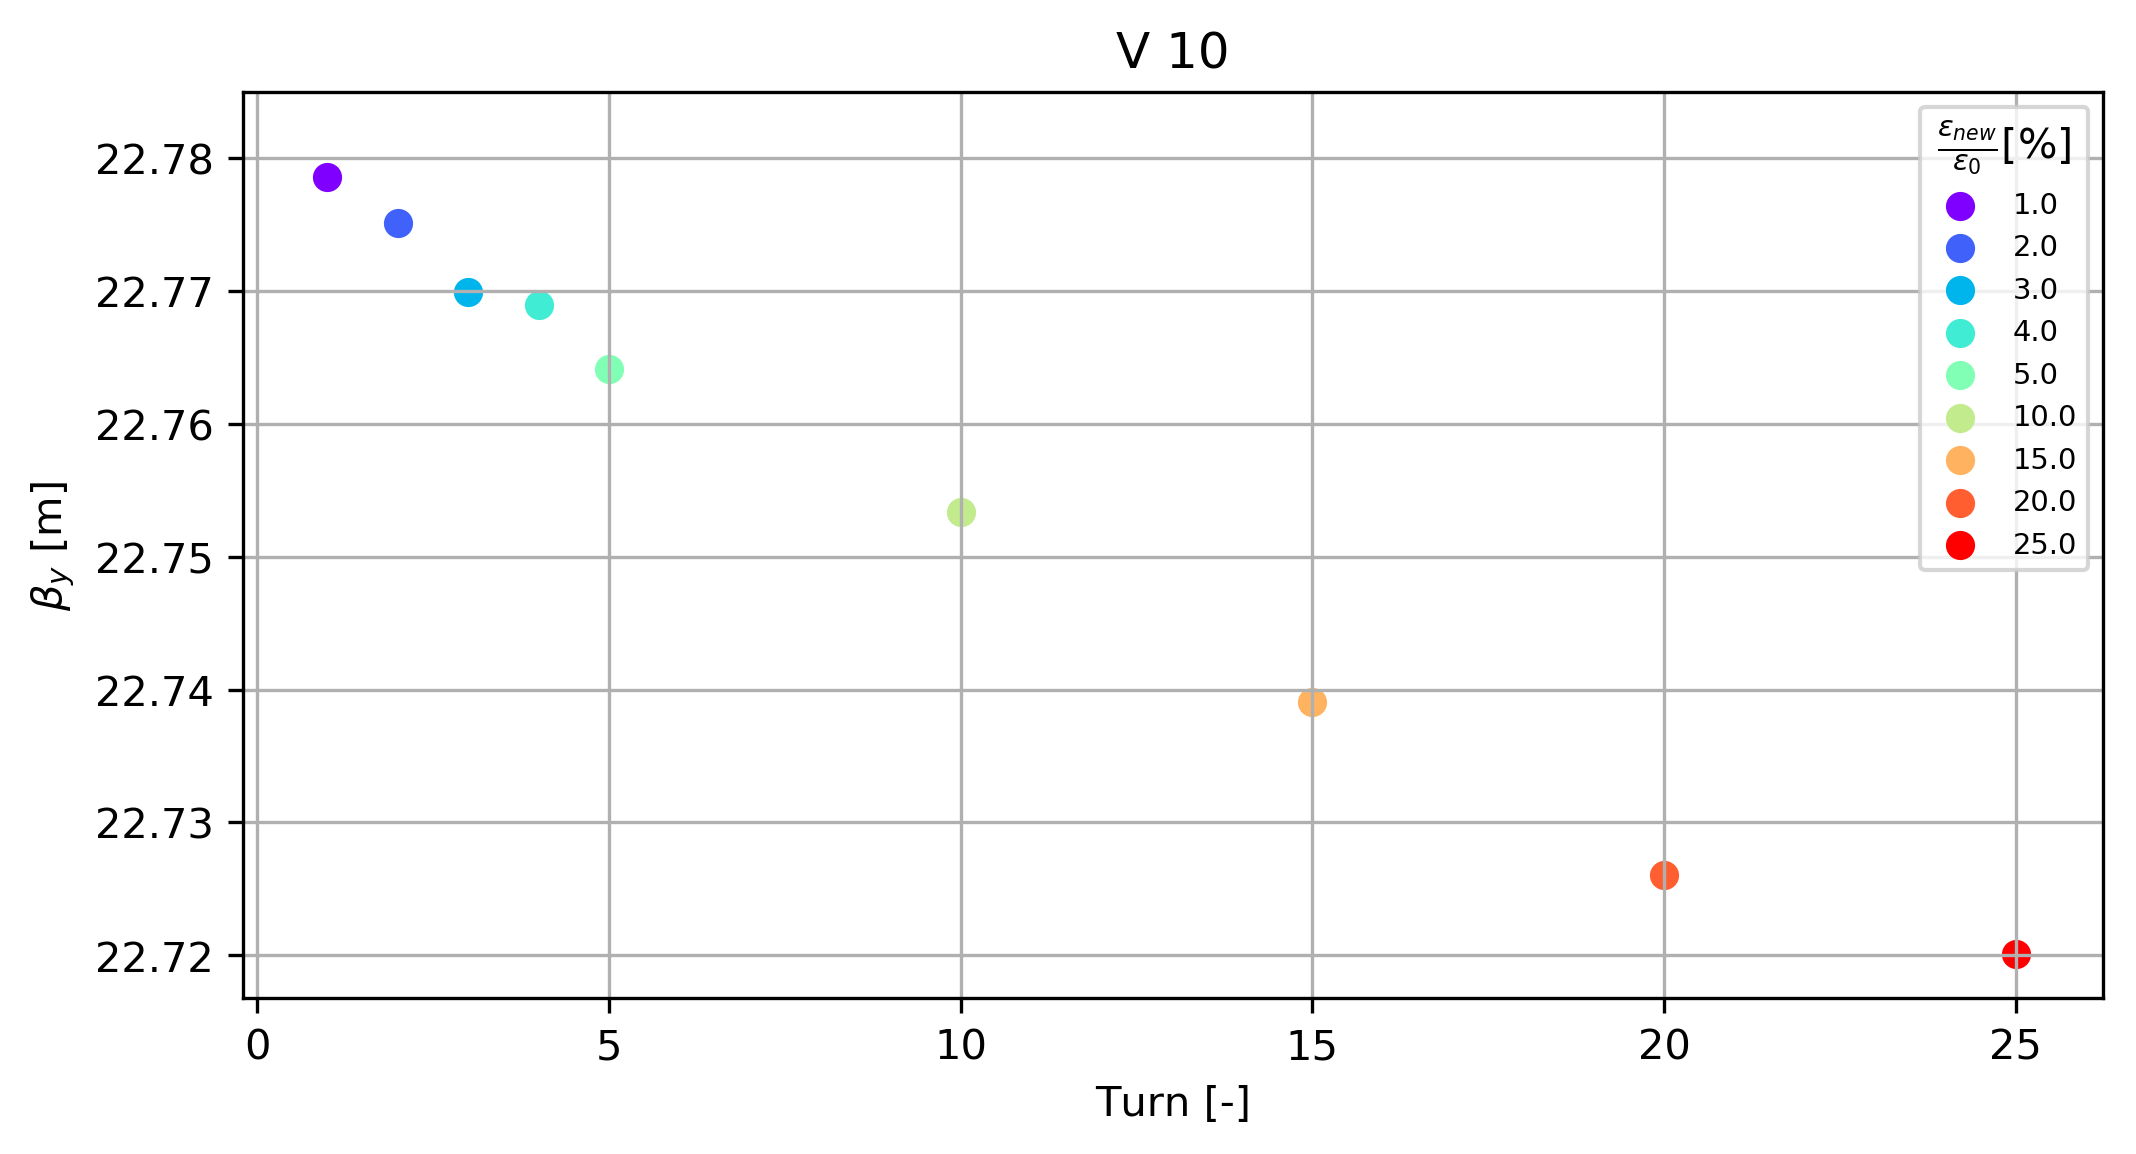

In [23]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title('V 10');

ax1.set_ylabel(r'$\beta_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(Q3)))
c_it = int(0)


for i in range(len(Q3)):
    ax1.scatter(Q3[i], By3[i], label=Q3[i], color=colors[c_it]);
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=1, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,2200)
#ax1.set_ylim(16, 23)

#savename = 'Plots_H/' + parameter + '_H.png'
plt.savefig(str(Plot_Folder +'/Vertical_Betas.png'), dpi = 800);

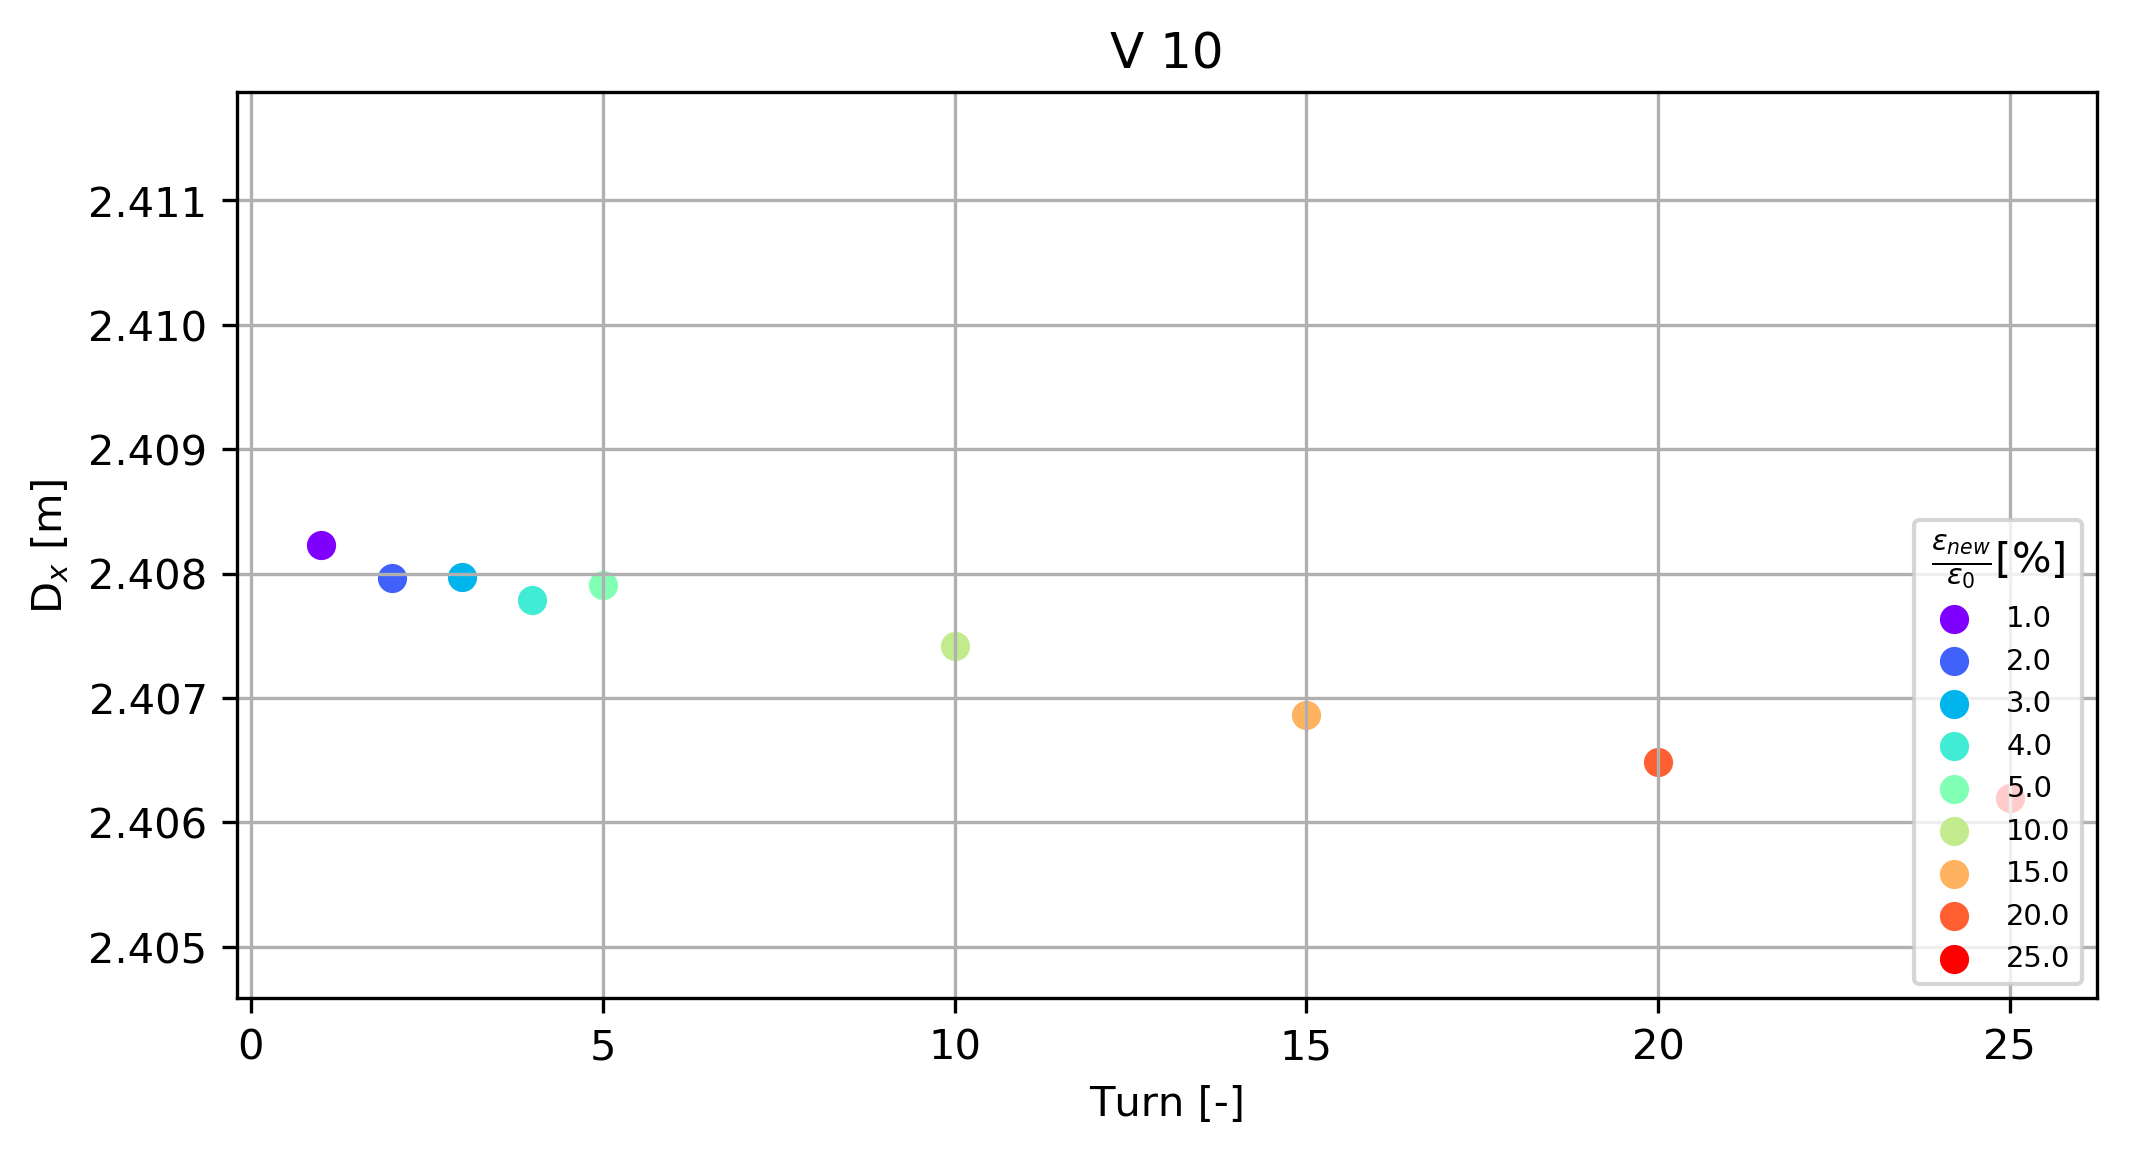

In [24]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title('V 10');

ax1.set_ylabel(r'D$_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(Q3)))
c_it = int(0)


for i in range(len(Q3)):
    ax1.scatter(Q3[i], Dx3[i], label=Q3[i], color=colors[c_it]);
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,2200)
#ax1.set_ylim(3, 5.5)

#savename = 'Plots_H/' + parameter + '_H.png'
plt.savefig(str(Plot_Folder +'/Horizontal_Ds.png'), dpi = 800);

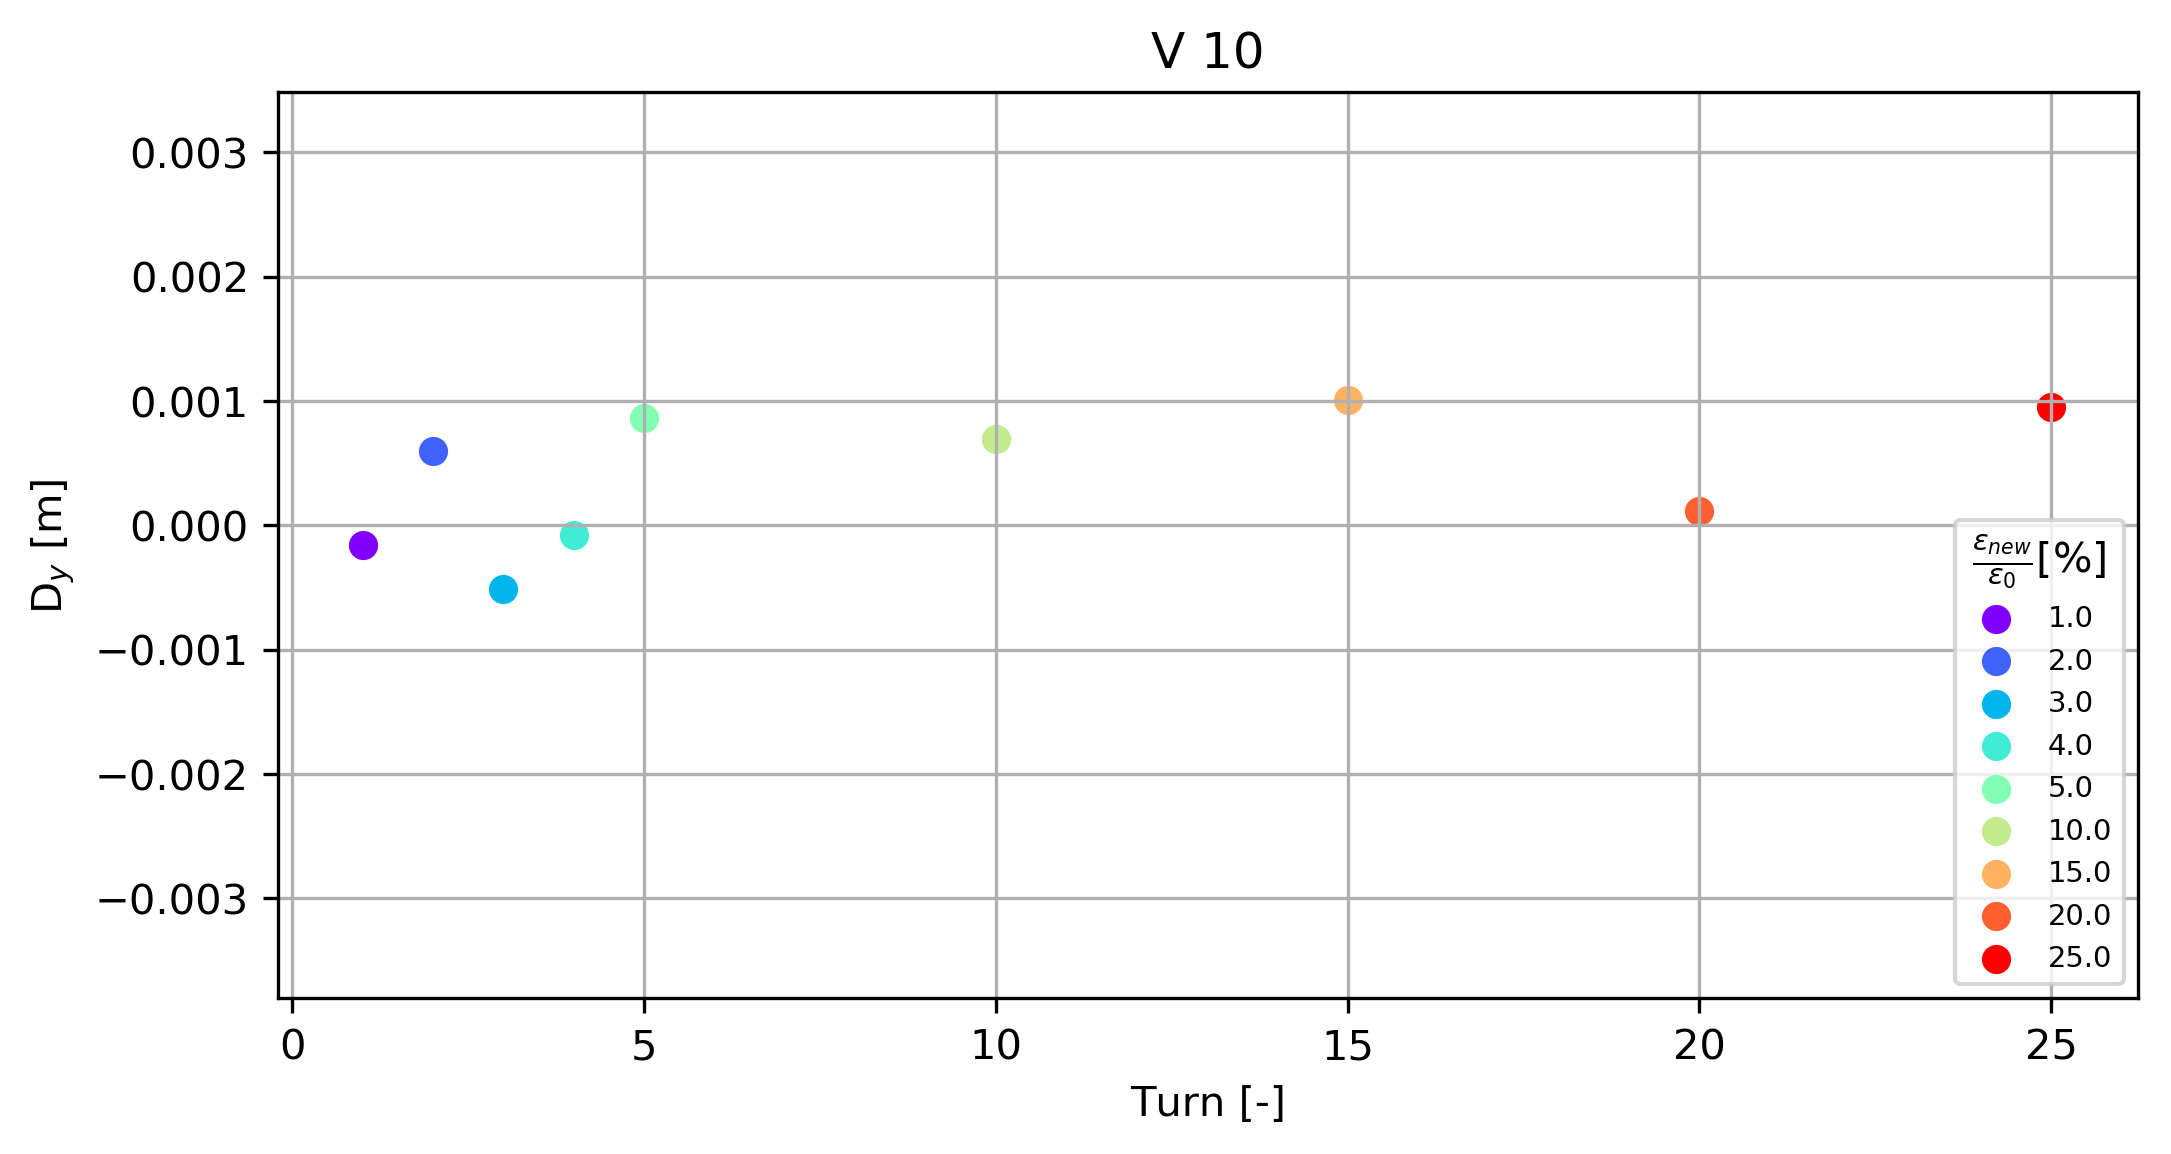

In [25]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title('V 10');

ax1.set_ylabel(r'D$_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(Q3)))
c_it = int(0)


for i in range(len(Q3)):
    ax1.scatter(Q3[i], Dy3[i], label=Q3[i], color=colors[c_it]);
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,2200)
#ax1.set_ylim(3, 5.5)

#savename = 'Plots_H/' + parameter + '_H.png'
plt.savefig(str(Plot_Folder +'/Vertical_Ds.png'), dpi = 800);